In [1]:
library(ArchR)
set.seed(1)
addArchRThreads(threads = 1)
addArchRGenome("mm10")
library(tidyverse)
library(here)
library(Seurat)
library(ComplexHeatmap)
library(ggpubr)
library(gghighlight)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

## Load data

In [ ]:
Merged.proj2.Germ <- readRDS(file="/home/leetl/Gonocyte/Raw_data/Germ.subset.newversion//Save-ArchR-Project.rds")

## Dimensionality reduction

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-501b2cc36e2-Date-2020-10-24_Time-10-26-20.log
If there is an issue, please report to github with logFile!

2020-10-24 10:26:20 : Computing Total Accessibility Across All Features, 0.001 mins elapsed.

2020-10-24 10:26:22 : Computing Top Features, 0.027 mins elapsed.

###########
2020-10-24 10:26:22 : Running LSI (1 of 3) on Top Features, 0.032 mins elapsed.
###########

2020-10-24 10:26:22 : Creating Partial Matrix, 0.032 mins elapsed.

2020-10-24 10:26:26 : Computing LSI, 0.102 mins elapsed.

2020-10-24 10:26:54 : Identifying Clusters, 0.559 mins elapsed.

2020-10-24 10:26:55 : Identified 7 Clusters, 0.576 mins elapsed.

2020-10-24 10:26:55 : Saving LSI Iteration, 0.577 mins elapsed.

2020-10-24 10:27:04 : Creating Cluster Matrix on the total Group Features, 0.73 mins elapsed.

2020-10-24 10:27:25 : Computing Variable Features, 1.085 mins elapsed.

###########
2020-10-24 10:27:25 : Running LSI (2 of 3) on Variable 

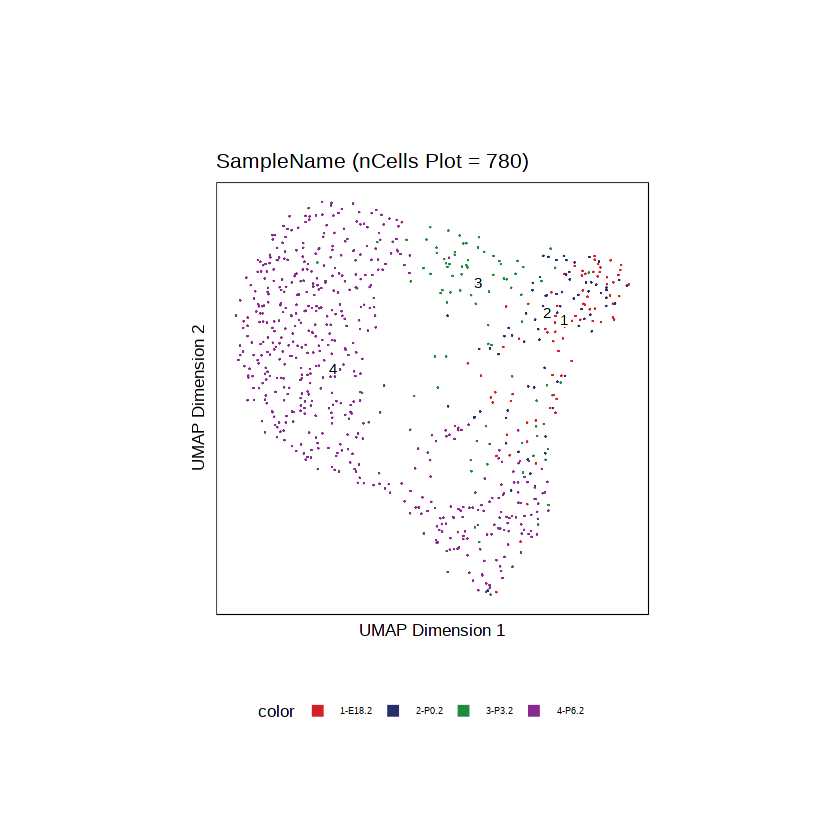

In [61]:
Merged.proj2.Germ <- addIterativeLSI(
    ArchRProj = Merged.proj2.Germ,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 3, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(1.5), 
        sampleCells = 10000, 
        n.start = 10,
        algorithm=2
    ), 
    varFeatures = 200000, 
    dimsToUse = 1:30,
    force = TRUE
)



In [62]:
Merged.proj2.Germ <- addUMAP(
    ArchRProj = Merged.proj2.Germ, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force = TRUE
)

10:29:14 UMAP embedding parameters a = 0.583 b = 1.334

10:29:14 Read 780 rows and found 30 numeric columns

10:29:14 Using Annoy for neighbor search, n_neighbors = 30

10:29:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

10:29:14 Writing NN index file to temp file /tmp/RtmpgXtnRm/file501b206891c8

10:29:14 Searching Annoy index using 12 threads, search_k = 3000

10:29:14 Annoy recall = 100%

10:29:14 Commencing smooth kNN distance calibration using 12 threads

10:29:15 Initializing from normalized Laplacian + noise

10:29:15 Commencing optimization for 500 epochs, with 34462 positive edges

10:29:17 Optimization finished



In [110]:
Merged.proj2.Germ <- addClusters(
    input = Merged.proj2.Germ,
    reducedDims = "IterativeLSI",
    method = "Seurat",
#     name = "Scran.Clusters",
    resolution = 0.5,
    force= TRUE
)

ArchR logging to : ArchRLogs/ArchR-addClusters-501b320a828c-Date-2020-10-24_Time-16-43-38.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters

2020-10-24 16:43:38 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 780
Number of edges: 33595

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8255
Number of communities: 7
Elapsed time: 0 seconds


2020-10-24 16:43:39 : Testing Outlier Clusters, 0.018 mins elapsed.

2020-10-24 16:43:39 : Assigning Cluster Names to 7 Clusters, 0.018 mins elapsed.

2020-10-24 16:43:39 : Finished addClusters, 0.019 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-501b4781c24b-Date-2020-10-24_Time-10-29-18.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-501b4781c24b-Date-2020-10-24_Time-10-29-18.log



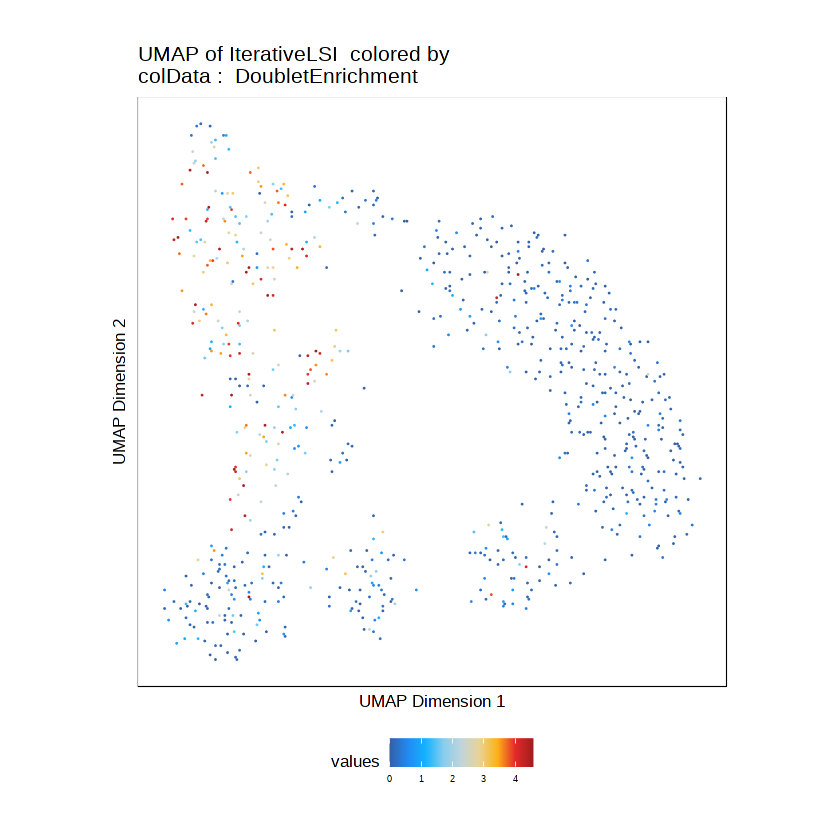

In [64]:
plotEmbedding(ArchRProj = Merged.proj2.Germ,embedding = "UMAP", colorBy ="cellColData", name = c("DoubletEnrichment"), size =2)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-501b7de5911-Date-2020-10-24_Time-16-43-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-501b7de5911-Date-2020-10-24_Time-16-43-44.log



$Sample

$Clusters


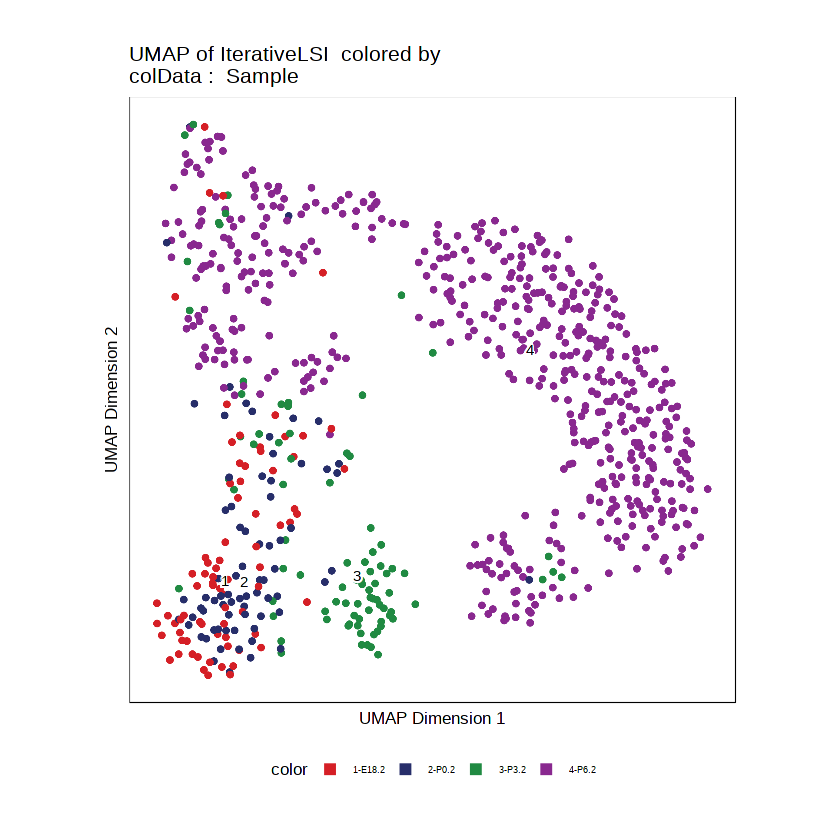

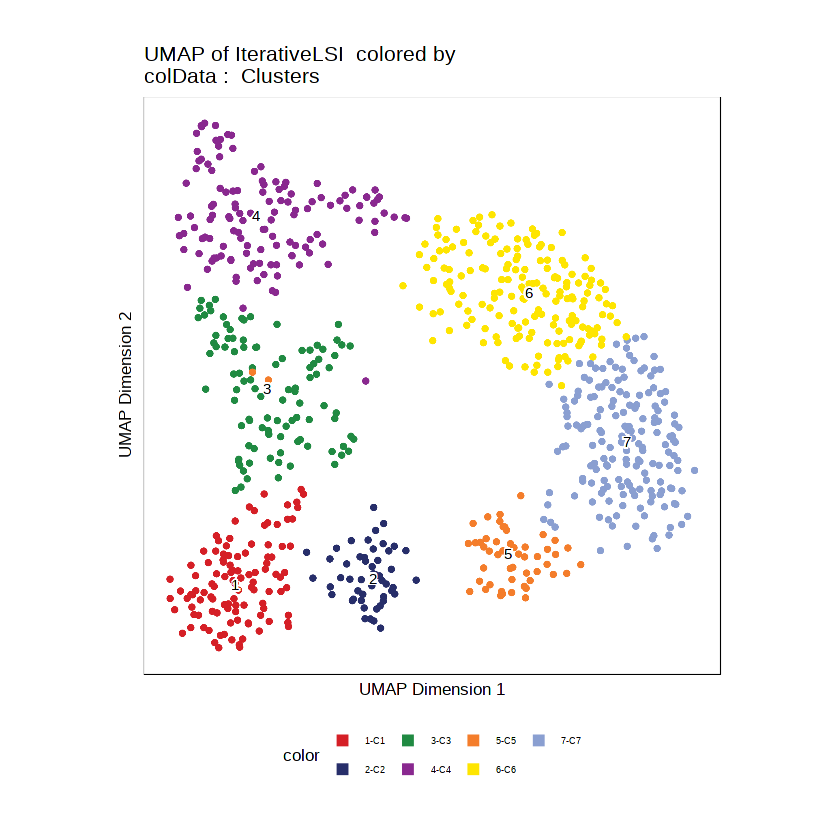

In [111]:
plotEmbedding(ArchRProj = Merged.proj2.Germ,embedding = "UMAP", colorBy ="cellColData", name = c("Sample","Clusters"), size =2)

## Integrate with scRNA-Seq

In [2]:
germ.seRNA <- readRDS("~/Gonocyte/testis.germcell.scRNAseq.rds")
# germ.seRNA <- subset(germ.seRNA,idents=c("Unknown 2","Unknown 1"),invert=TRUE)

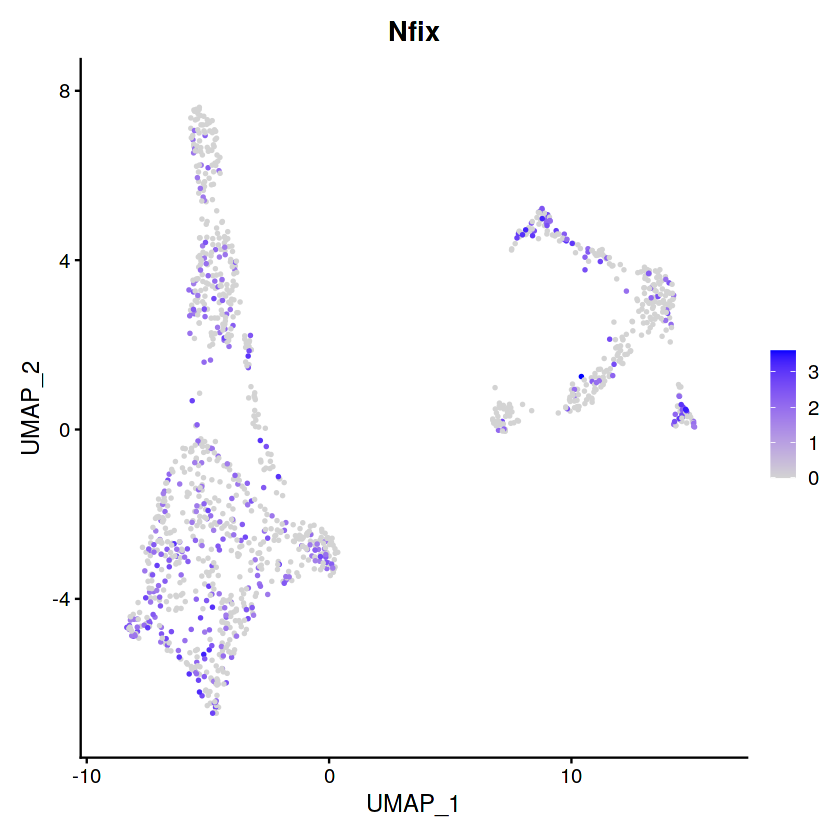

In [10]:
FeaturePlot(germ.seRNA, features = "Nfix", pt.size = 0.5)

In [7]:
germ.seRNA@meta.data$idents.rename2 <- Idents(germ.seRNA)

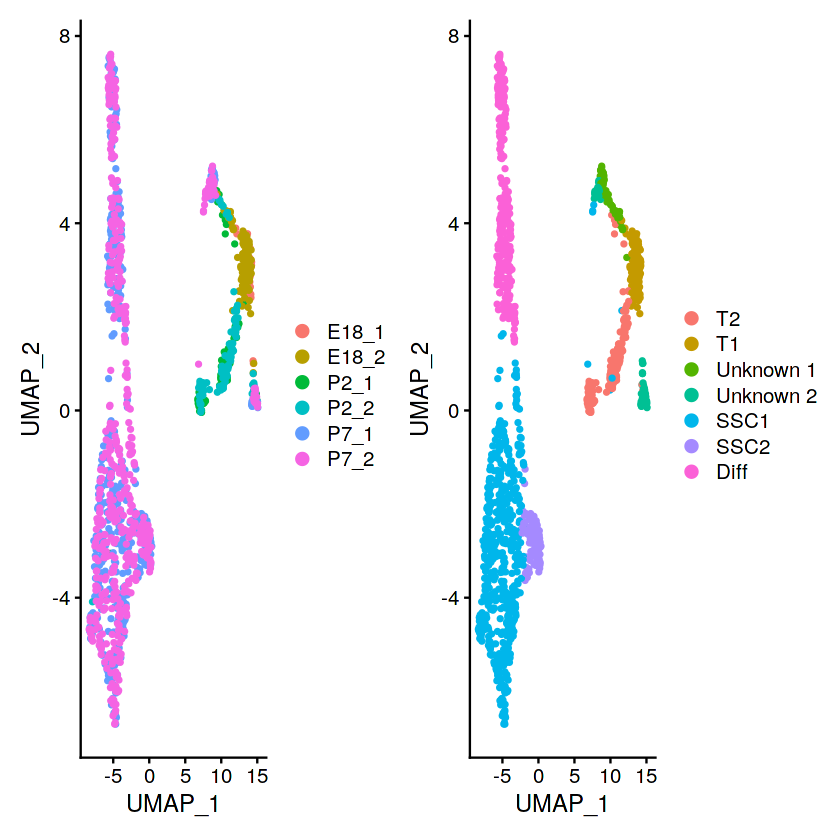

In [8]:
D1 <- DimPlot(germ.seRNA,group.by = "sample")
D2 <- DimPlot(germ.seRNA,group.by = "idents.rename2")
D1 + D2
# pdf(file="Germcell.scRNA-seq.umap.pdf",width=10,height=4)
# D1 + D2
# dev.off()

In [23]:
Merged.proj2.Germ <- addImputeWeights(Merged.proj2.Germ,k=19,ka=3,td=2)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-6a5d48a9bda6-Date-2020-11-09_Time-14-29-35.log
If there is an issue, please report to github with logFile!

2020-11-09 14:29:35 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [41]:
Merged.proj2.Germ <- addGeneIntegrationMatrix(
    ArchRProj = Merged.proj2.Germ, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "IterativeLSI",
    seRNA = germ.seRNA,
    addToArrow = TRUE,
    #test option below
    groupRNA = "idents.rename",
    nameCell = "predictedCell_Un",
    nameGroup = "predictedGroup_Un",
    nameScore = "predictedScore_Un",
    force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-501b1f6752bc-Date-2020-10-24_Time-10-09-33.log
If there is an issue, please report to github with logFile!

2020-10-24 10:09:33 : Running Seurat's Integration Stuart* et al 2019, 0.003 mins elapsed.

2020-10-24 10:09:33 : Checking ATAC Input, 0.008 mins elapsed.

2020-10-24 10:09:33 : Checking RNA Input, 0.008 mins elapsed.

2020-10-24 10:09:35 : Creating Integration Blocks, 0.028 mins elapsed.

2020-10-24 10:09:35 : Prepping Interation Data, 0.028 mins elapsed.

2020-10-24 10:09:35 : Computing Integration in 1 Integration Blocks!, 0 mins elapsed.

2020-10-24 10:09:35 : Block (1 of 1) : Computing Integration, 0 mins elapsed.

2020-10-24 10:09:35 : Block (1 of 1) : Identifying Variable Genes, 0.008 mins elapsed.

2020-10-24 10:09:37 : Block (1 of 1) : Getting GeneScoreMatrix, 0.036 mins elapsed.

2020-10-24 10:09:40 : Block (1 of 1) : Imputing GeneScoreMatrix, 0.08 mins elapsed.

Getting ImputeWeights

2020-10-24 10:09:41 : Blo

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-501b30fdef3b-Date-2020-10-24_Time-16-41-11.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-501b30fdef3b-Date-2020-10-24_Time-16-41-11.log



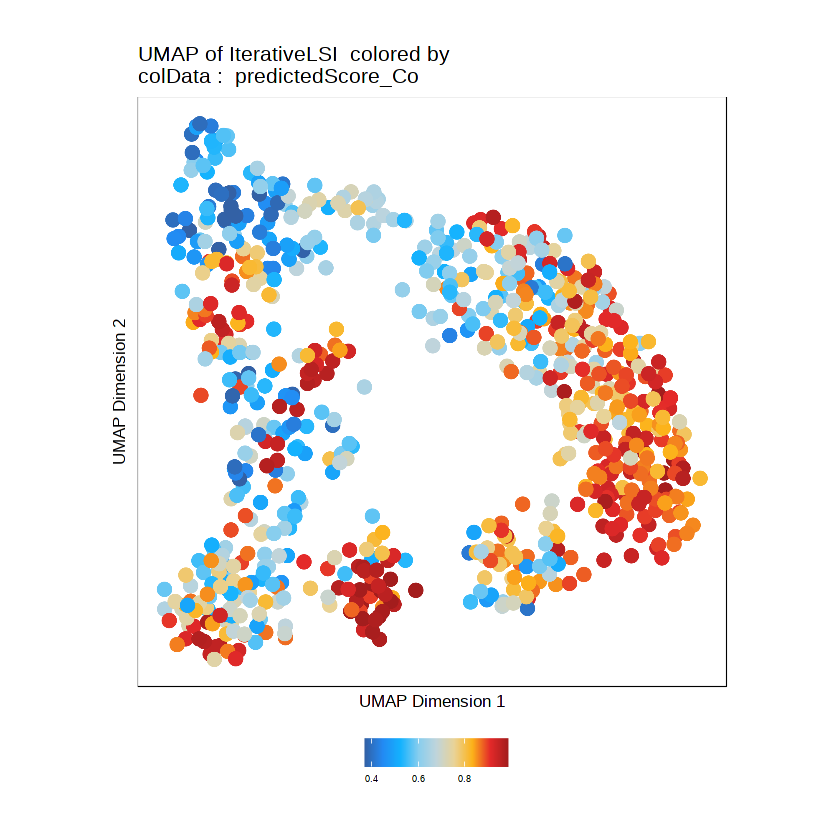

In [100]:
#  pal <- paletteDiscrete(values = germ.seRNA$idents.rename)
p1 <- plotEmbedding(
    Merged.proj2.Germ, 
    colorBy = "cellColData", 
    name = "predictedScore_Co", 
#      pal = pal,
    size=5,
    plotAs = "points"
)
p1

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-501b41d00c07-Date-2020-10-24_Time-10-11-46.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-501b41d00c07-Date-2020-10-24_Time-10-11-46.log



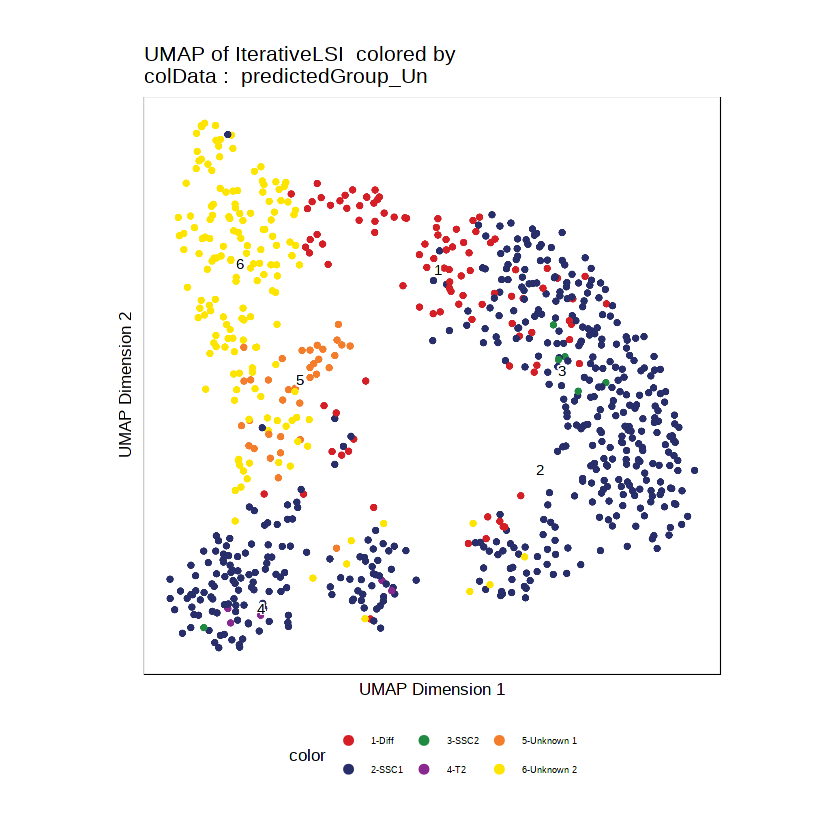

In [43]:
 pal <- paletteDiscrete(values = germ.seRNA$idents.rename)
p1 <- plotEmbedding(
    Merged.proj2.Germ, 
    colorBy = "cellColData", 
    name = "predictedGroup_Un", 
     pal = pal,
    size=2
)
p1

In [37]:
Merged.proj2.Germ <- addGeneIntegrationMatrix(
    ArchRProj = Merged.proj2.Germ, 
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "IterativeLSI",
    seRNA = germ.seRNA,
    addToArrow = FALSE,
    groupList = groupList,
    groupATAC = "Sample",
   groupRNA = "idents.rename2",
    nameCell = "predictedCell_Co",
    nameGroup = "predictedGroup_Co",
    nameScore = "predictedScore_Co",
    force = TRUE,
    threads = 1,
    nGenes = 2000,
)



ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-6a5d2d009d06-Date-2020-11-09_Time-14-39-25.log
If there is an issue, please report to github with logFile!

2020-11-09 14:39:25 : Running Seurat's Integration Stuart* et al 2019, 0.002 mins elapsed.

2020-11-09 14:39:25 : Checking ATAC Input, 0.007 mins elapsed.

2020-11-09 14:39:25 : Checking RNA Input, 0.007 mins elapsed.

2020-11-09 14:39:26 : Creating Integration Blocks, 0.024 mins elapsed.

2020-11-09 14:39:26 : Prepping Interation Data, 0.024 mins elapsed.

2020-11-09 14:39:27 : Computing Integration in 2 Integration Blocks!, 0 mins elapsed.

2020-11-09 14:39:27 : Block (1 of 2) : Computing Integration, 0 mins elapsed.

2020-11-09 14:39:27 : Block (1 of 2) : Identifying Variable Genes, 0.013 mins elapsed.

2020-11-09 14:39:29 : Block (1 of 2) : Getting GeneScoreMatrix, 0.037 mins elapsed.

2020-11-09 14:39:30 : Block (1 of 2) : Imputing GeneScoreMatrix, 0.058 mins elapsed.

Getting ImputeWeights

2020-11-09 14:39:31 : Bl

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a5d38a1a5ce-Date-2020-11-09_Time-14-42-05.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a5d38a1a5ce-Date-2020-11-09_Time-14-42-05.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a5d71c7abd1-Date-2020-11-09_Time-14-42-06.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a5d71c7abd1-Date-2020-11-09_Time-14-42-06.log



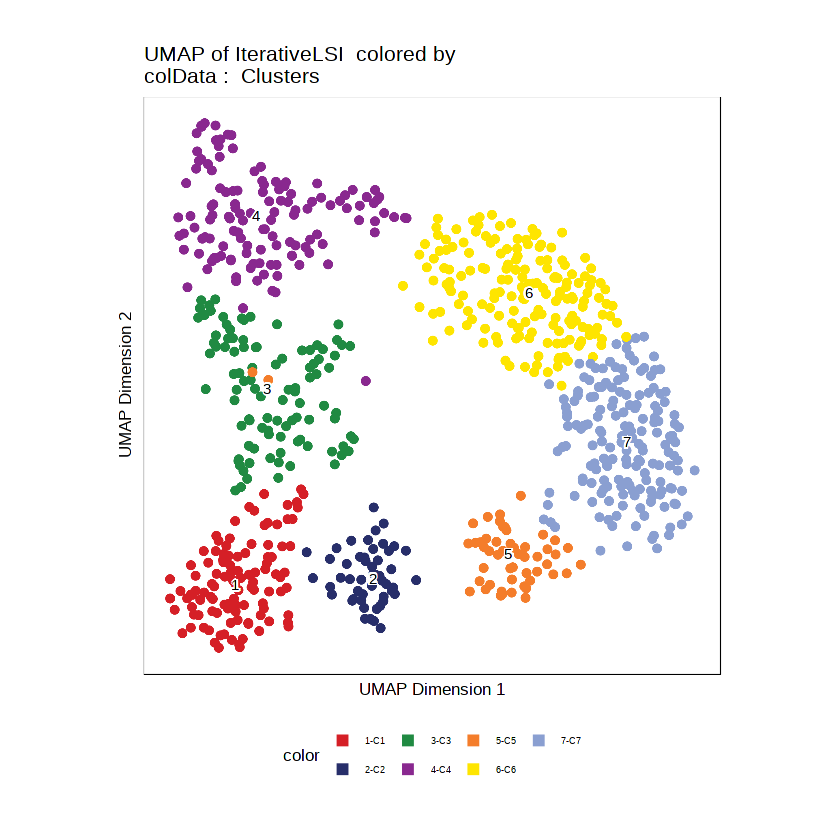

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a5d732f0a84-Date-2020-11-09_Time-14-42-08.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a5d732f0a84-Date-2020-11-09_Time-14-42-08.log



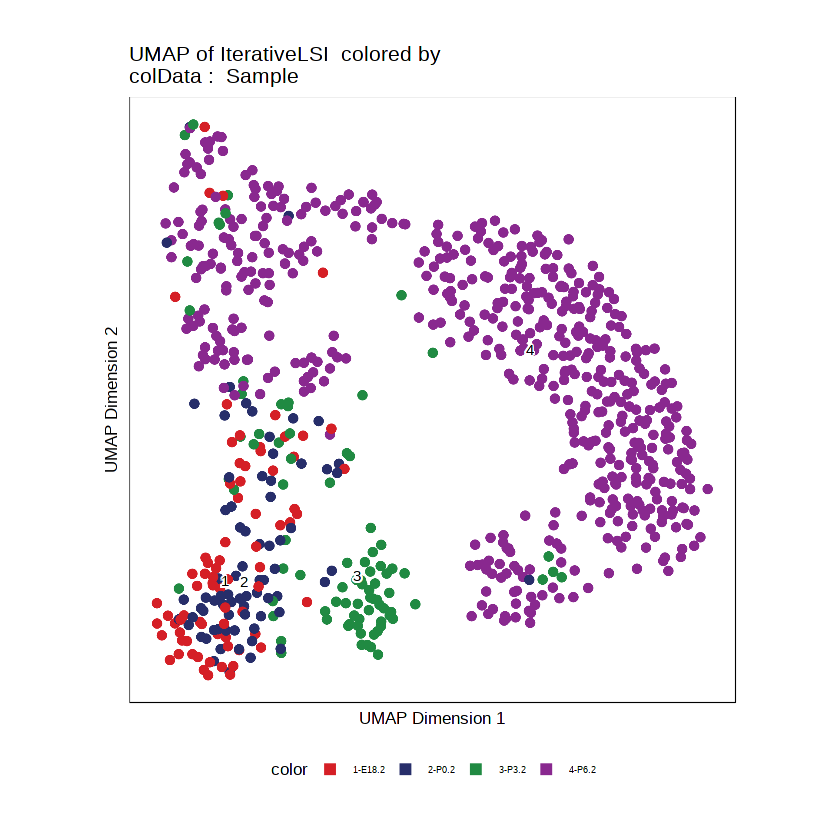

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a5d4e125a75-Date-2020-11-09_Time-14-42-10.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a5d4e125a75-Date-2020-11-09_Time-14-42-10.log



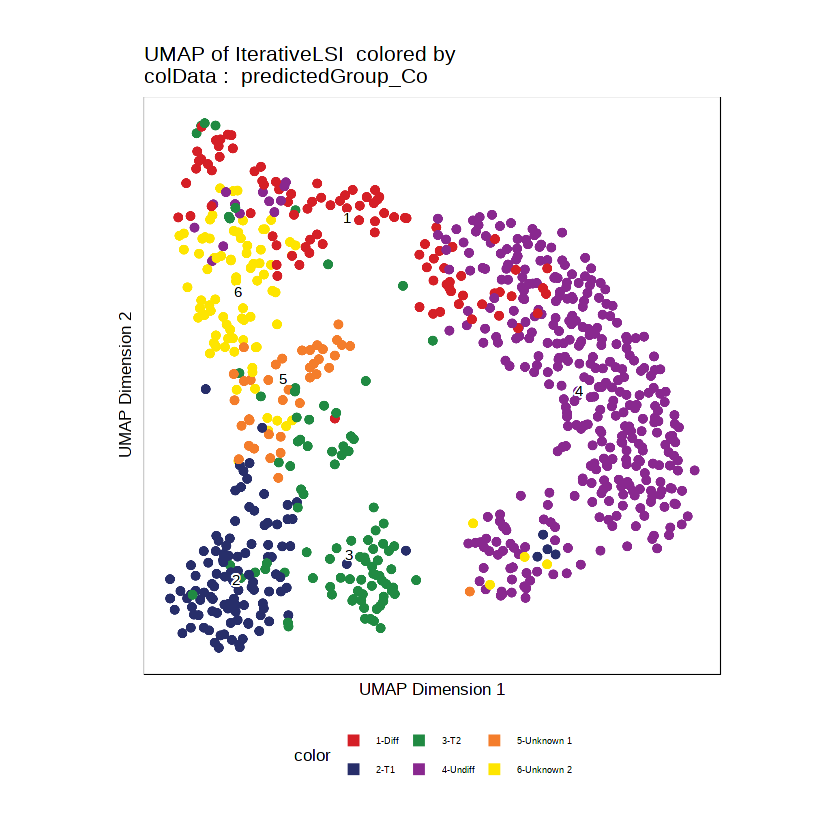

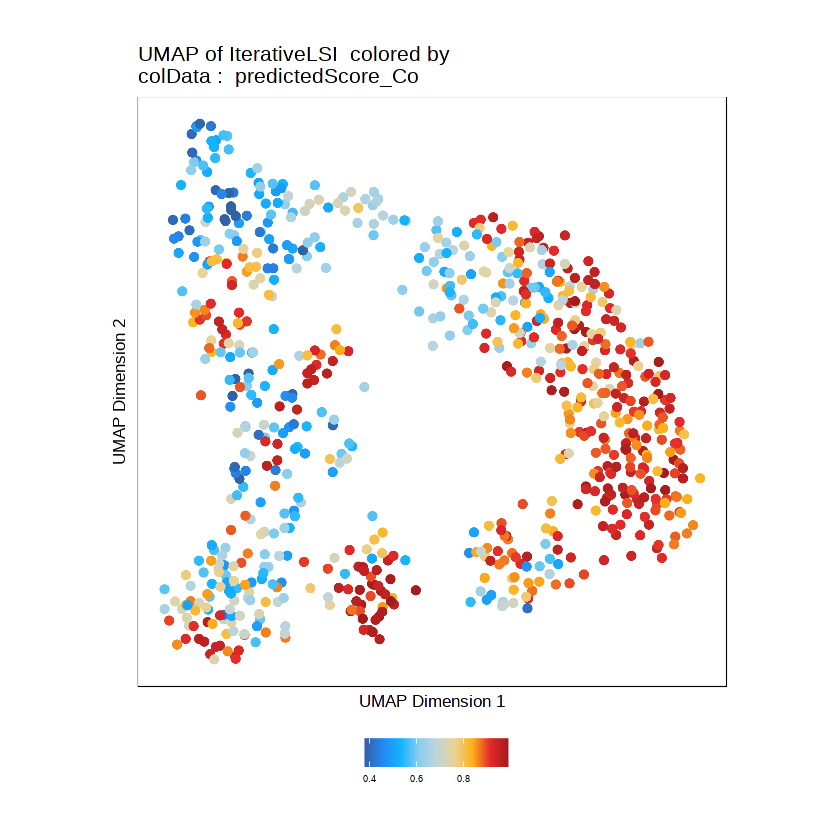

In [44]:
p2 <- plotEmbedding(
    Merged.proj2.Germ, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = "Clusters", 
#     pal = pal,
    size=3
)
p2
p3 <- plotEmbedding(
    Merged.proj2.Germ, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = "Sample", 
#     pal = pal,
    size=3
)
p3
p4 <- plotEmbedding(
    Merged.proj2.Germ, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = "predictedGroup_Co", 
#     pal = pal,
    size=3
)
p4
p5 <- plotEmbedding(
    Merged.proj2.Germ, 
    embedding = "UMAP",
    colorBy = "cellColData",
    name = "predictedScore_Co", 
#     pal = pal,
    size=3,
    plotAs ="points"
)
p5

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a5d595f4a14-Date-2020-11-09_Time-15-53-06.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a5d595f4a14-Date-2020-11-09_Time-15-53-06.log



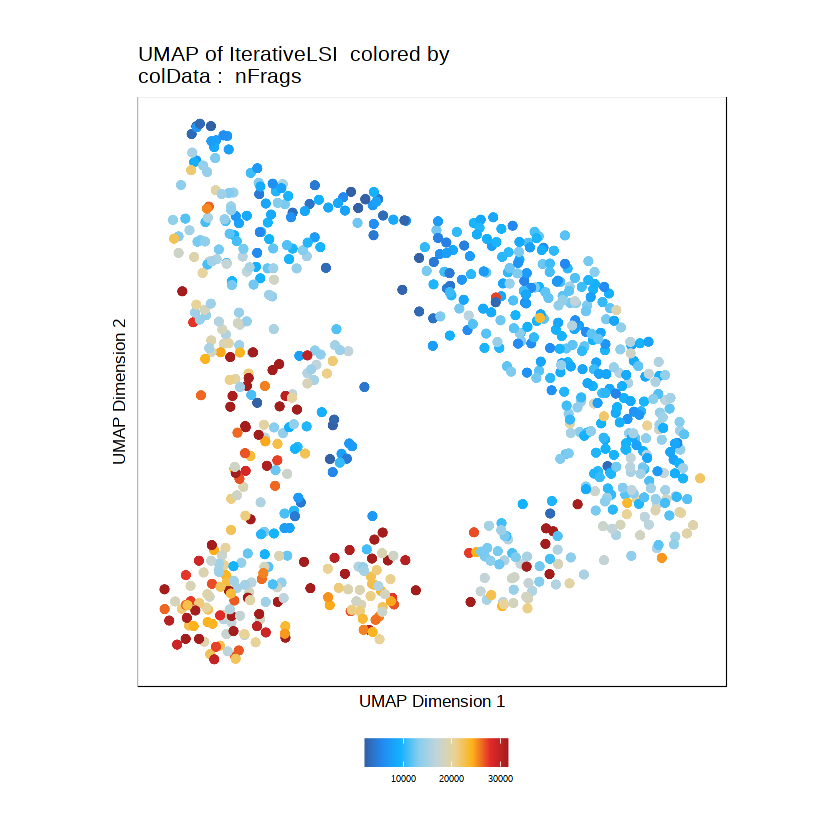

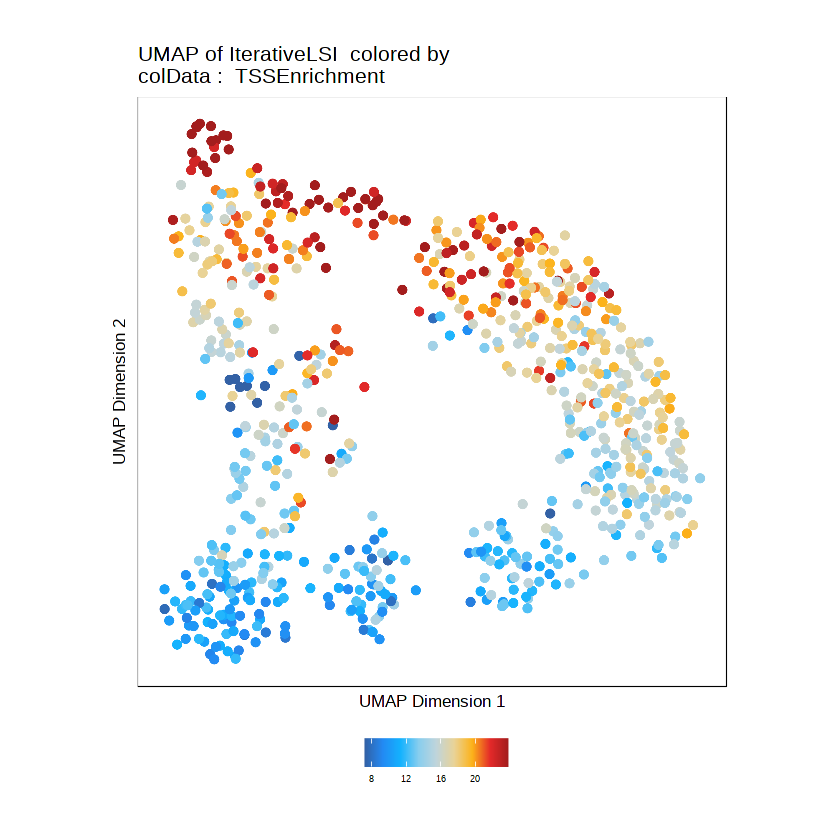

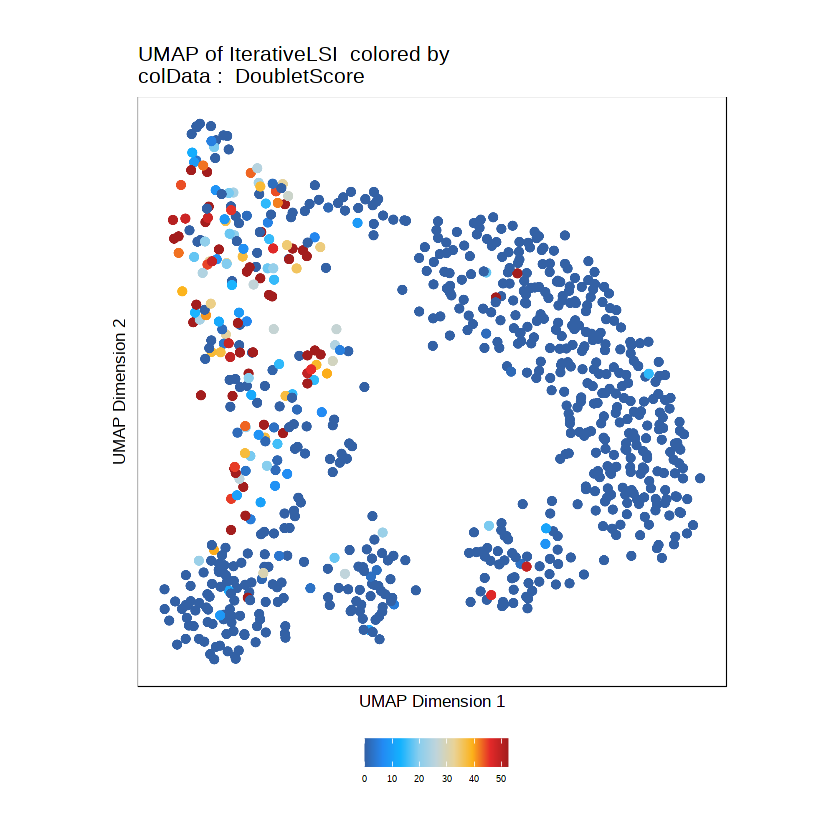

$nFrags

$TSSEnrichment

$DoubletScore

$ReadsInTSS

$DoubletEnrichment


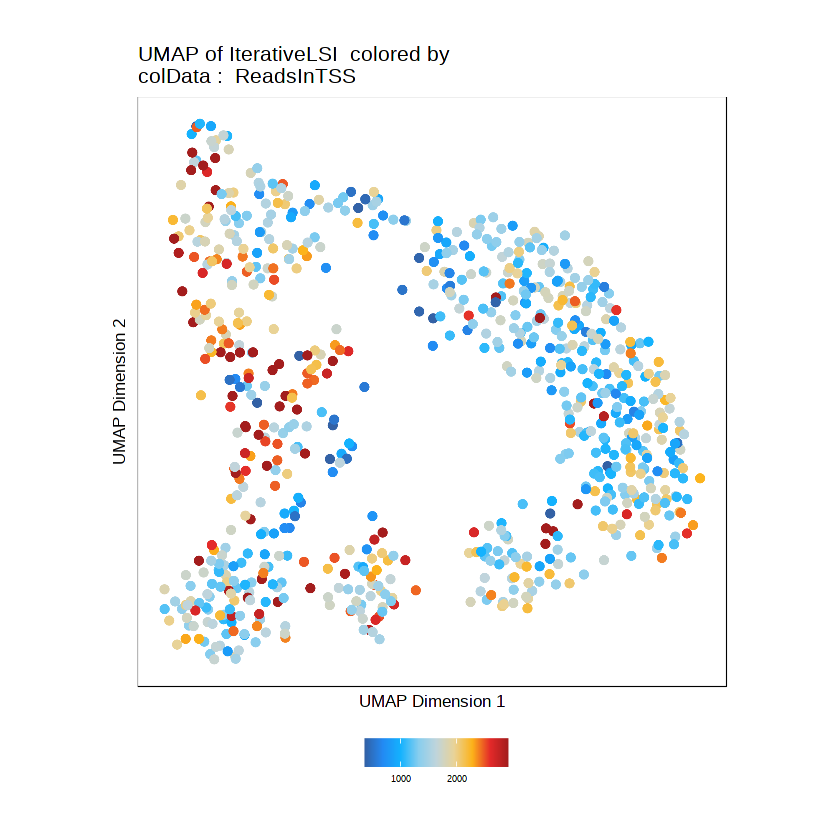

pdf 
  3

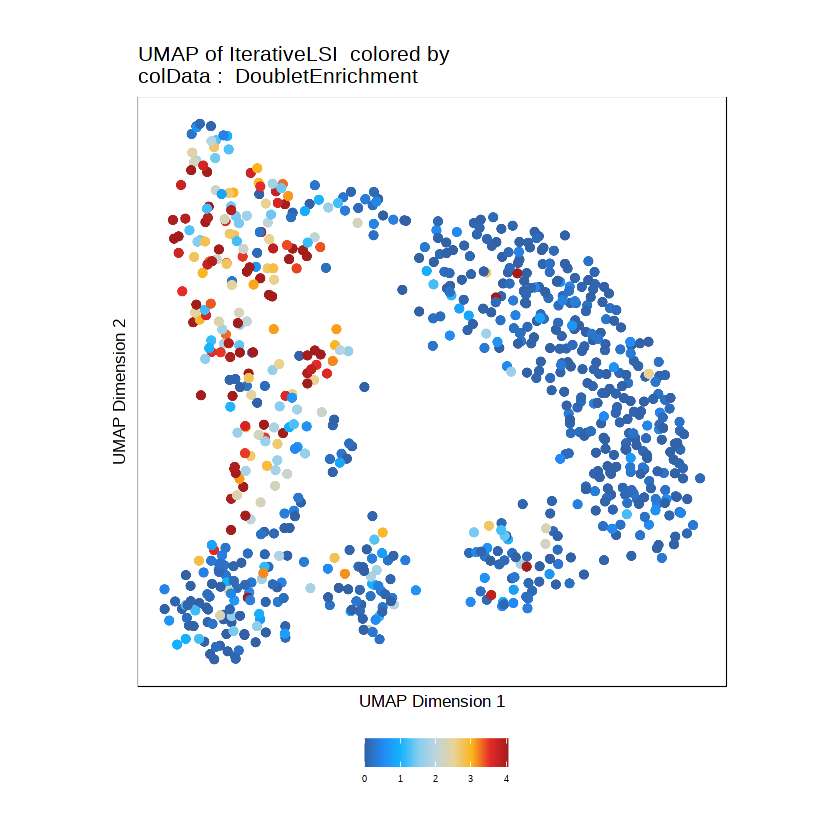

In [92]:
pdf(file="Germcell.QC.UMAP.202011.pdf",width=5,height=5)
p <- plotEmbedding(
    ArchRProj = Merged.proj2.Germ, 
    colorBy = "cellColData",
    name = c("nFrags","TSSEnrichment","DoubletScore","ReadsInTSS","DoubletEnrichment"),
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(Merged.proj2.Germ),
    plotAs = "point",
    size =3 
)
p
dev.off()

### Calling peaks

In [90]:
Merged.proj2.Germ@cellColData$celltype <- "Germ_cell"

In [ ]:
# Not run, crashed jupyter notebook
# Merged.proj2.Germ <- addGroupCoverages(ArchRProj = Merged.proj2.Germ, groupBy = "Scran.Clusters")
# 70000 peaks
# test unite peak calling
Merged.proj2.Germ <- addGroupCoverages(ArchRProj = Merged.proj2.Germ, groupBy = "celltype")

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-501b67c2e1c9-Date-2020-10-24_Time-14-39-22.log
If there is an issue, please report to github with logFile!

Germ_cell (1 of 1) : CellGroups N = 4

2020-10-24 14:39:23 : Creating Coverage Files!, 0.007 mins elapsed.

2020-10-24 14:39:23 : Batch Execution w/ safelapply!, 0.007 mins elapsed.

2020-10-24 14:39:23 : Group Germ_cell._.P6.2 (1 of 4) : Creating Group Coverage File : Germ_cell._.P6.2.insertions.coverage.h5, 0.007 mins elapsed.

Number of Cells = 500

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2020-10-24 14:39:42 : Group Germ_cell._.P3.2 (2 of 4) : Creating Group Coverage File : Germ_cell._.P3.2.insertions.coverage.h5, 0.327 mins elapsed.

Number of Cells = 86

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2020-10-24 14:39:58 :

In [92]:
pathToMacs2 <- findMacs2()
Merged.proj2.Germ <- addReproduciblePeakSet(
    ArchRProj = Merged.proj2.Germ, 
    groupBy = "celltype", 
    pathToMacs2 = pathToMacs2
)


2020-10-24 14:43:09 : Group 2 of 4, Calling Peaks with MACS2!, 1.353 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 1.87e+09 --name Germ_cell._.P3.2-2 --treatment /home/leetl/Gonocyte/Raw_data/Germ.subset.newversion/PeakCalls/InsertionBeds/Germ_cell._.P3.2-2.insertions.bed --outdir /home/leetl/Gonocyte/Raw_data/Germ.subset.newversion/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2020-10-24 14:43:52 : Group 3 of 4, Calling Peaks with MACS2!, 2.085 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 1.87e+09 --name Germ_cell._.E18.2-3 --treatment /home/leetl/Gonocyte/Raw_data/Germ.subset.newversion/PeakCalls/InsertionBeds/Germ_cell._.E18.2-3.insertions.bed --outdir /home/leetl/Gonocyte/Raw_data/Germ.subset.newversion/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2020-10-24 14:44:39 : Group 4 of 4, Calling Peaks with

[1] "/home/leetl/Gonocyte/Raw_data/Germ.subset.newversion/PeakCalls/Germ_cell-reproduciblePeaks.gr.rds"


2020-10-24 14:45:25 : Creating Union Peak Set!, 3.628 mins elapsed.

Converged after 1 iterations!

Plotting Ggplot!

2020-10-24 14:45:27 : Finished Creating Union Peak Set (83364)!, 3.663 mins elapsed.



In [93]:
Merged.proj2.Germ <- addPeakMatrix(Merged.proj2.Germ)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-501b4672086a-Date-2020-10-24_Time-14-45-27.log
If there is an issue, please report to github with logFile!

2020-10-24 14:45:27 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

2020-10-24 14:45:37 : Adding P3.2 to PeakMatrix for Chr (1 of 20)!, 0.004 mins elapsed.

2020-10-24 14:45:38 : Adding P3.2 to PeakMatrix for Chr (2 of 20)!, 0.029 mins elapsed.

2020-10-24 14:45:40 : Adding P3.2 to PeakMatrix for Chr (3 of 20)!, 0.053 mins elapsed.

2020-10-24 14:45:41 : Adding P3.2 to PeakMatrix for Chr (4 of 20)!, 0.077 mins elapsed.

2020-10-24 14:45:43 : Adding P3.2 to PeakMatrix for Chr (5 of 20)!, 0.102 mins 

In [94]:
Merged.proj2.Germ <- addMotifAnnotations(ArchRProj = Merged.proj2.Germ, motifSet = "cisbp", name = "Motif",force = TRUE)
Merged.proj2.Germ <- addBgdPeaks(Merged.proj2.Germ)


No methods found in package ‘IRanges’ for request: ‘score’ when loading ‘TFBSTools’

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-501bd7d708b-Date-2020-10-24_Time-14-48-00.log
If there is an issue, please report to github with logFile!

peakAnnotation name already exists! Overriding.

2020-10-24 14:48:02 : Gettting Motif Set, Species : Mus musculus, 0.003 mins elapsed.

Using version 2 motifs!

2020-10-24 14:48:03 : Finding Motif Positions with motifmatchr!, 0.026 mins elapsed.

2020-10-24 14:49:06 : Creating Motif Overlap Matrix, 1.082 mins elapsed.

2020-10-24 14:49:07 : Finished Getting Motif Info!, 1.097 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-501bd7d708b-Date-2020-10-24_Time-14-48-00.log

Identifying Background Peaks!



In [95]:
Merged.proj2.Germ <- addDeviationsMatrix(
  ArchRProj = Merged.proj2.Germ, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-501b7c7ed036-Date-2020-10-24_Time-14-49-13.log
If there is an issue, please report to github with logFile!



NULL


2020-10-24 14:49:15 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

2020-10-24 14:49:25 : chromVAR deviations P3.2 (1 of 4) Schep (2017), 0.158 mins elapsed.

2020-10-24 14:49:27 : P3.2 (1 of 4) : Deviations for Annotation 44 of 884, 0.033 mins elapsed.

2020-10-24 14:49:30 : P3.2 (1 of 4) : Deviations for Annotation 88 of 884, 0.079 mins elapsed.

2020-10-24 14:49:32 : P3.2 (1 of 4) : Deviations for Annotation 132 of 884, 0.119 mins elapsed.

2020-10-24 14:49:36 : P3.2 (1 of 4) : Deviations for Annotation 176 of 884, 0.177 mins elapsed.

2020-10-24 14:49:39 : P3.2 (1 of 4) : Deviations for Annotation 220 of 884, 0.234 mins elapsed.

2020-10-24 14:49:4

### Find marker genes

In [166]:
markersGS <- getMarkerFeatures(
    ArchRProj = Merged.proj2.Germ, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    k = 100,
    normBy = "ReadsInTSS",
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-6a5dea5991a-Date-2020-11-11_Time-15-18-44.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-11-11 15:18:44 : Matching Known Biases, 0.001 mins elapsed.

2020-11-11 15:18:45 : Computing Pairwise Tests (1 of 7), 0.021 mins elapsed.

2020-11-11 15:19:03 : Computing Pairwise Tests (2 of 7), 0.322 mins elapsed.

2020-11-11 15:19:20 : Computing Pairwise Tests (3 of 7), 0.591 mins elapsed.

2020-11-11 15:19:36 : Computing Pairwise Tests (4 of 7), 0.862 mins elapsed.

2020-11-11 15:19:52 : Computing Pairwise Tests (5 of 7), 1.133 mins elapsed.

2020-11-11 15:20:08 : Computing Pairwise Tests (6 of 7), 1.401 mins elapsed.

2020-11-11 15:20:24 : Computing Pairwise Tests (7 of 7), 1.672 mins elapsed.

###########
2020-11-11 15:20:41 : Completed Pairwise Tests, 1.947 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-6a5dea5991a-Date-2020-11-11_Time-15

In [168]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.1 & Log2FC >= 0")

DataFrame with 0 rows and 9 columns

In [170]:
heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.1 & Log2FC >= 0.25", 
labelMarkers = markerGenes,
  transpose = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-6a5d1d19ad82-Date-2020-11-11_Time-15-21-03.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	Xkr4, Rp1, Sox17, Mrpl15, Sntg1, Vxn, Prex2, A830018L16Rik, Sulf1, Kcnb2, Pi15, Crisp4, Tfap2d, Kcnq5, Rims1, Mir30c-2, Fam135a, Col9a1, Col19a1, Lmbrd1

C2:

	Xkr4, Rp1, Sox17, Mrpl15, Sntg1, Vxn, Prex2, A830018L16Rik, Sulf1, Kcnb2, Pi15, Crisp4, Tfap2d, Kcnq5, Rims1, Mir30c-2, Fam135a, Col9a1, Col19a1, Lmbrd1

C3:

	Arhgap23, Mir202, G630071F17Rik, Xkr4, Rp1, Sox17, Mrpl15, Sntg1, Vxn, Prex2, A830018L16Rik, Sulf1, Kcnb2, Pi15, Crisp4, Tfap2d, Kcnq5, Rims1, Mir30c-2, Fam135a

C4:

	Tns1, Btg2, Ppa1, Hmg20b, Lrp1, Lrrc75a, Mir3971, Stat3, Cavin1, Grn, Sept9, Cep295nl, Baiap2, Id2, Nrp, Slc25a29, Mir345, BB123696, 4931406H21Rik, Ppp2r2a

C5:

	Xkr4, Rp1, Sox17, Mrpl15, Sntg1, Vxn, Prex2, A830018L16Rik, Sulf1, Kcnb2, Pi15, Crisp4, Tfap2d, Kcnq5, Rims1, Mir30c-2, Fam135a, Col9a1, Col19a1, Lmbrd1



In [171]:
pdf(file="germ.GS.marker.heatmap.pdf")
ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

png 
  2

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a7e3c9d2b9-Date-2021-07-27_Time-17-44-22.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneIntegrationMatrix

Getting Matrix Values...

2021-07-27 17:44:23 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a7e3c9d2b9-Date-2021-07-27_Time-17-44-22.log



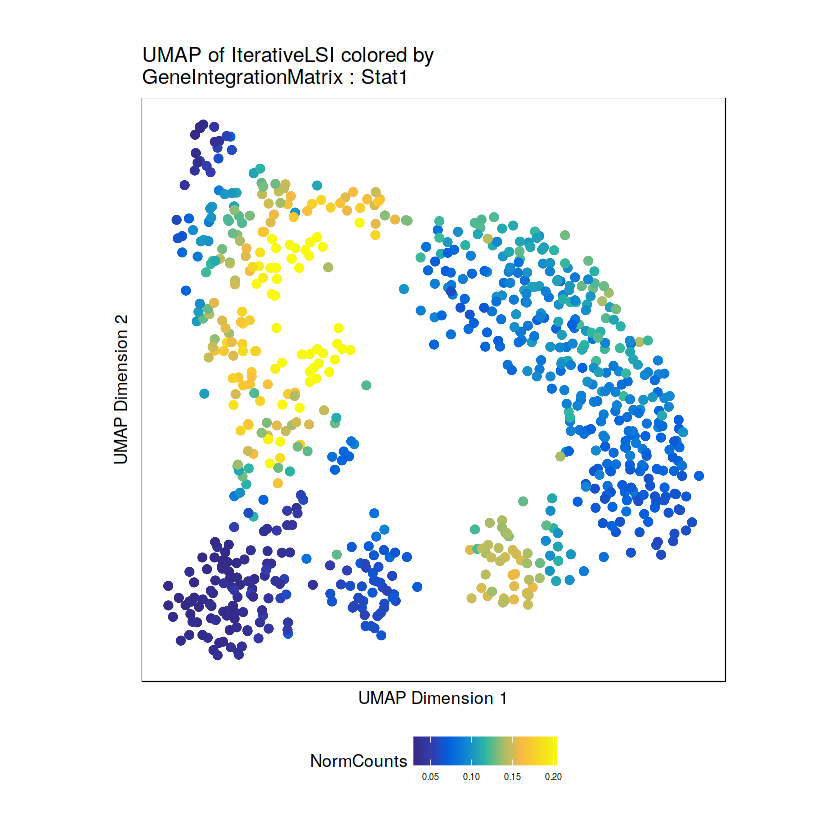

In [3]:
p1 <- plotEmbedding(
    ArchRProj = Merged.proj2.Germ, 
    colorBy = "GeneIntegrationMatrix", 
    name = c("Stat1"), 
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    continuousSet = "blueYellow",
    imputeWeights = getImputeWeights(Merged.proj2.Germ),
    plotAs = "point",
    size =3
)

p1

In [38]:
pdf(file="germ.TF.umap.pdf",width=5,height=5)
p1
p
dev.off()

$Ybx2

$Smad3

$Zfp410

$Msc

$Nr5a1

$Nfix


$`z:Ybx2_821`

$`z:Smad3_723`

$`z:Zfp410_196`

$`z:Msc_43`

$`z:Nr5a1_848`

$`z:Nfix_722`


png 
  2

p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

### Find GIM marker

In [245]:
markersGIM <- getMarkerFeatures(
    ArchRProj = Merged.proj2.Germ, 
    useMatrix = "GeneIntegrationMatrix", 
    maxCells = 500,
#      useGroups= usegroups,
    groupBy = "Clusters",
    k=200,
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-501b338af55d-Date-2020-10-24_Time-23-48-27.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-10-24 23:48:28 : Matching Known Biases, 0.001 mins elapsed.

2020-10-24 23:48:29 : Computing Pairwise Tests (1 of 7), 0.017 mins elapsed.

2020-10-24 23:48:48 : Computing Pairwise Tests (2 of 7), 0.345 mins elapsed.

2020-10-24 23:49:07 : Computing Pairwise Tests (3 of 7), 0.661 mins elapsed.

2020-10-24 23:49:27 : Computing Pairwise Tests (4 of 7), 0.982 mins elapsed.

2020-10-24 23:49:46 : Computing Pairwise Tests (5 of 7), 1.304 mins elapsed.

2020-10-24 23:50:05 : Computing Pairwise Tests (6 of 7), 1.62 mins elapsed.

2020-10-24 23:50:24 : Computing Pairwise Tests (7 of 7), 1.946 mins elapsed.

###########
2020-10-24 23:50:44 : Completed Pairwise Tests, 2.272 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-501b338af55d-Date-2020-10-24_Time-2

In [ ]:
Merged.proj2.Germ <- addImputeWeights(Merged.proj2.Germ,k=9,ka=3,td=2)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6a5d756e9c2b-Date-2020-11-09_Time-16-13-03.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-11-09 16:13:03 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6a5d756e9c2b-Date-2020-11-09_Time-16-13-03.log



$Neurog3

$Vim


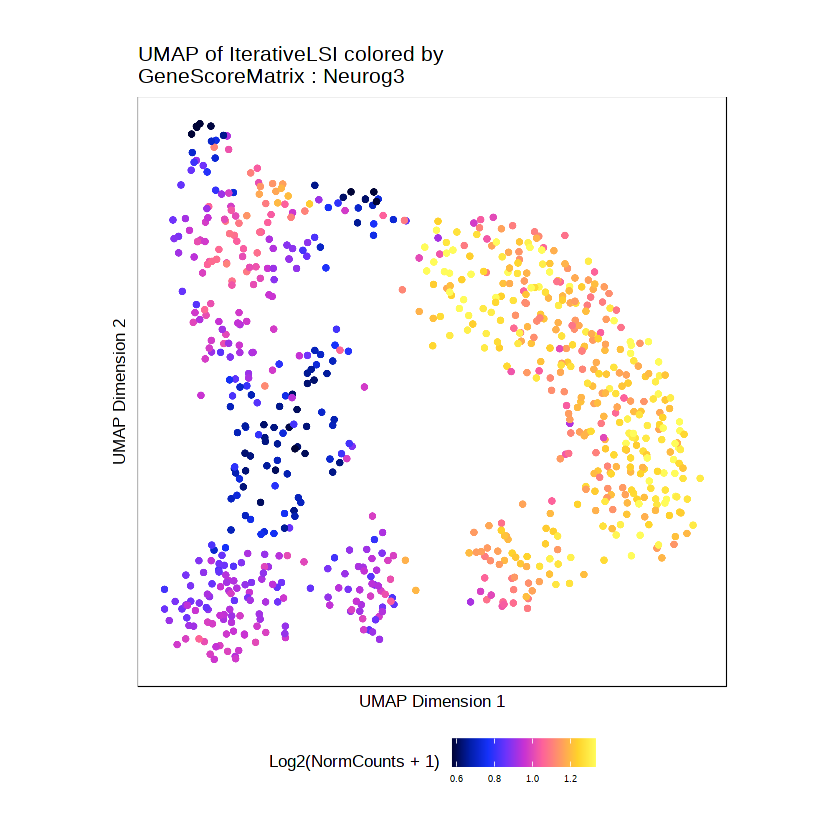

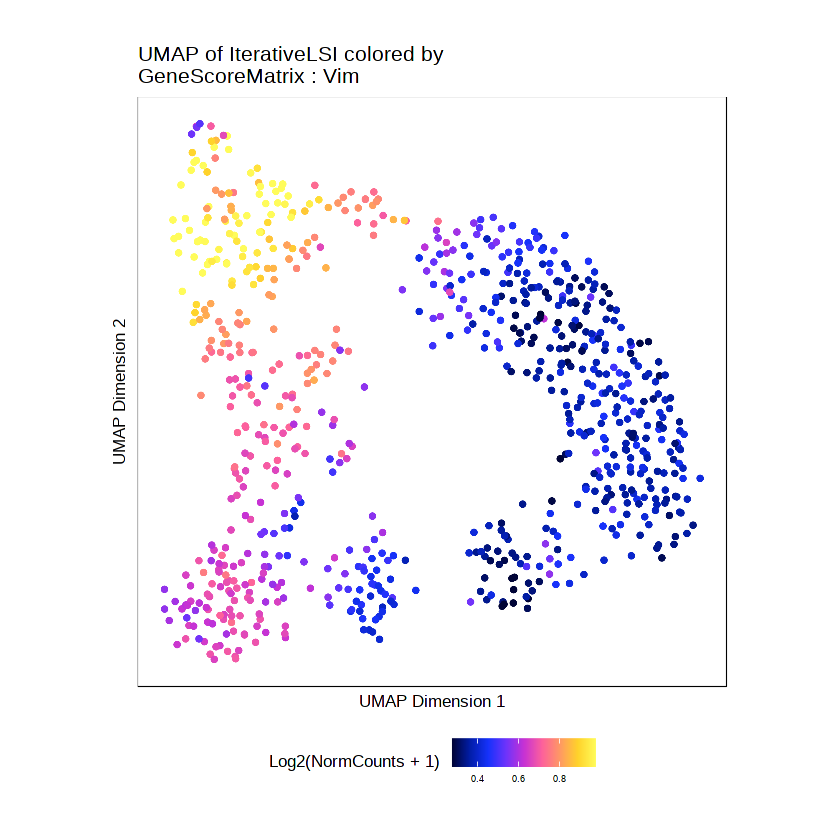

In [100]:
p <- plotEmbedding(
    ArchRProj = Merged.proj2.Germ, 
    colorBy = "GeneScoreMatrix",
    name = c("Neurog3","Vim"),
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(Merged.proj2.Germ),
    plotAs = "point",
    size =2 
)
p


In [ ]:
heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.01", 
#   labelMarkers = "Wt1",
  transpose = TRUE
)

In [ ]:
##### ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")

## Plot trajectory

In [58]:
Major.trajectory <- c("C1", "C2", "C5","C7","C6","C4")
Merged.proj2.Germ <- addTrajectory(
    ArchRProj = Merged.proj2.Germ, 
    name = "Major_trajectory", 
    groupBy = "Clusters",
    trajectory = Major.trajectory, 
    embedding = "UMAP", 
    force = TRUE
)


ArchR logging to : ArchRLogs/ArchR-addTrajectory-1cce307034e3-Date-2021-01-15_Time-15-53-57.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

Overriding previous entry for Major_trajectory

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-1cce307034e3-Date-2021-01-15_Time-15-53-57.log



ArchR logging to : ArchRLogs/ArchR-plotTrajectory-1cce7abfcba7-Date-2021-01-15_Time-15-54-00.log
If there is an issue, please report to github with logFile!

Plotting

Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-1cce7abfcba7-Date-2021-01-15_Time-15-54-00.log

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



[[1]]

[[2]]


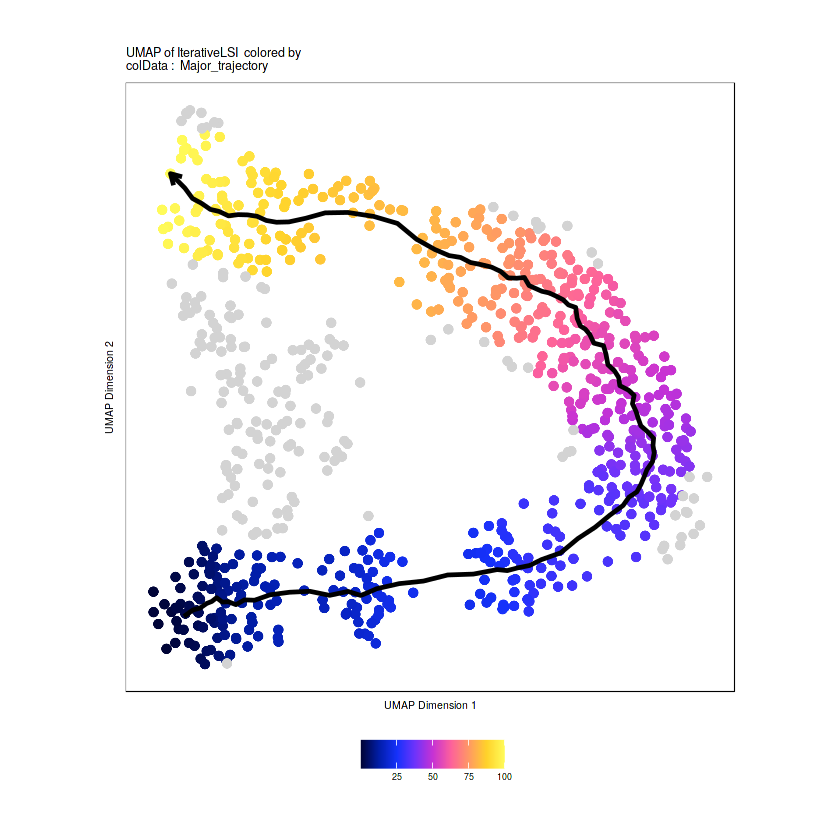

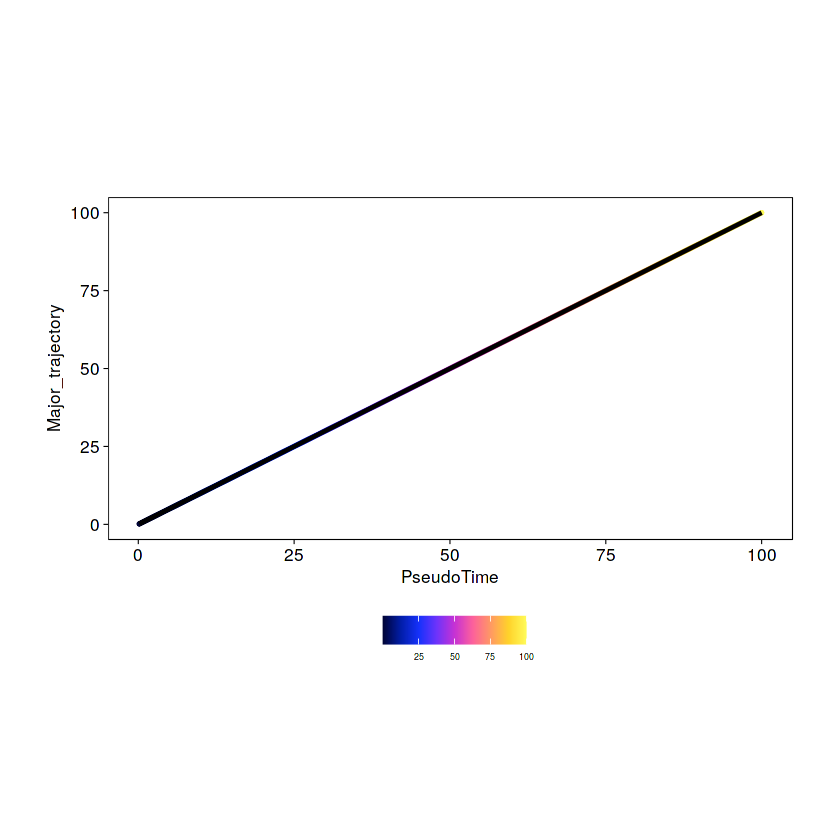

In [59]:
p <- plotTrajectory(Merged.proj2.Germ, trajectory = "Major_trajectory",
                    size = 3,plotAs = 'points',
                    colorBy = "cellColData", name = "Major_trajectory")
p


In [146]:
trajMM  <- getTrajectory(ArchRProj = Merged.proj2.Germ, name = "Major_trajectory", useMatrix = "MotifMatrix", log2Norm = FALSE)
p1 <- plotTrajectoryHeatmap(trajMM, pal = paletteContinuous(set = "solarExtra"),labelTop = 100,varCutOff=0.9)
p1

Creating Trajectory Group Matrix..

Some values are below 0, this could be a DeviationsMatrix in which scaleTo should be set = NULL.
Continuing without depth normalization!

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d7ba7cf52-Date-2020-11-10_Time-12-35-42.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2020-11-10 12:35:42 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2020-11-10 12:35:42 : 

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d7ba7cf52-Date-2020-11-10_Time-12-35-42.log



In [147]:
pdf("Germ.major.pseudotime.MM.pdf",height=12)
p1
dev.off()

png 
  2

In [144]:
trajGSM <- getTrajectory(ArchRProj = Merged.proj2.Germ, name = "Major_trajectory", useMatrix = "GeneScoreMatrix", log2Norm = TRUE)
p2 <- trajectoryHeatmap(trajGSM,  pal = paletteContinuous(set = "horizonExtra"),labelTop = 100,varCutOff=0.9)
p2


Creating Trajectory Group Matrix..

Smoothing...

Warning message:
“'trajectoryHeatmap' is deprecated.
Use 'plotTrajectoryHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d1e894afc-Date-2020-11-10_Time-12-35-01.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d1e894afc-Date-2020-11-10_Time-12-35-01.log



In [145]:
pdf("Germ.major.pseudotime.GSM.pdf",height=12)
p2
dev.off()

png 
  2

In [53]:
trajGIM <- getTrajectory(ArchRProj = Merged.proj2.Germ, name = "Major_trajectory", useMatrix = "GeneIntegrationMatrix", log2Norm = TRUE)
p3 <- plotTrajectoryHeatmap(trajGIM,  pal = paletteContinuous(set = "blueYellow"),varCutOff=0.9)
p3
pdf("Germ.major.pseudotime.GIM.pdf",height=12)
p3
dev.off()

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d2fc44557-Date-2020-11-09_Time-14-52-40.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d2fc44557-Date-2020-11-09_Time-14-52-40.log



png 
  2

In [56]:
#integration
corGIM_MM <- correlateTrajectories(trajGIM, trajMM,corCutOff = 0.4,varCutOff1=0.5,varCutOff2=0.5)
trajGIM2 <- trajGIM[corGIM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGIM_MM[[1]]$name2, ]

trajCombined <- trajGIM2
assay(trajCombined) <- t(apply(assay(trajGIM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))

combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGIM2))
ht3 <- plotTrajectoryHeatmap(trajGIM2,  pal = paletteContinuous(set = "blueYellow"),  varCutOff = 0, rowOrder = rowOrder)
ht4 <- plotTrajectoryHeatmap(trajMM2, pal = paletteContinuous(set = "solarExtra"), varCutOff = 0, rowOrder = rowOrder)
ht3 + ht4

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-6a5d4602fa7c-Date-2020-11-09_Time-15-01-34.log
If there is an issue, please report to github with logFile!

Found 42 Correlated Pairings!

2020-11-09 15:01:44 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d7b3a7181-Date-2020-11-09_Time-15-01-44.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d7b3a7181-Date-2020-11-09_Time-15-01-44.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d4de07459-Date-2020-11-09_Time-15-01-45.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d4de07459-Date-2020-11-09_Time-15-01-45.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-6a5d254474e5-Date-2020-11-09_Time-15-01-45.log
If there is an issue, please report to github with logFile!

u

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-1cce39294386-Date-2021-01-15_Time-15-56-51.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2021-01-15 15:56:51 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 167 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-1cce39294386-Date-2021-01-15_Time-15-56-51.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-1cce1d2f4d4f-Date-2021-01-15_Time-15-56-52.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2021-01-15 15:56:52 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 167 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajector

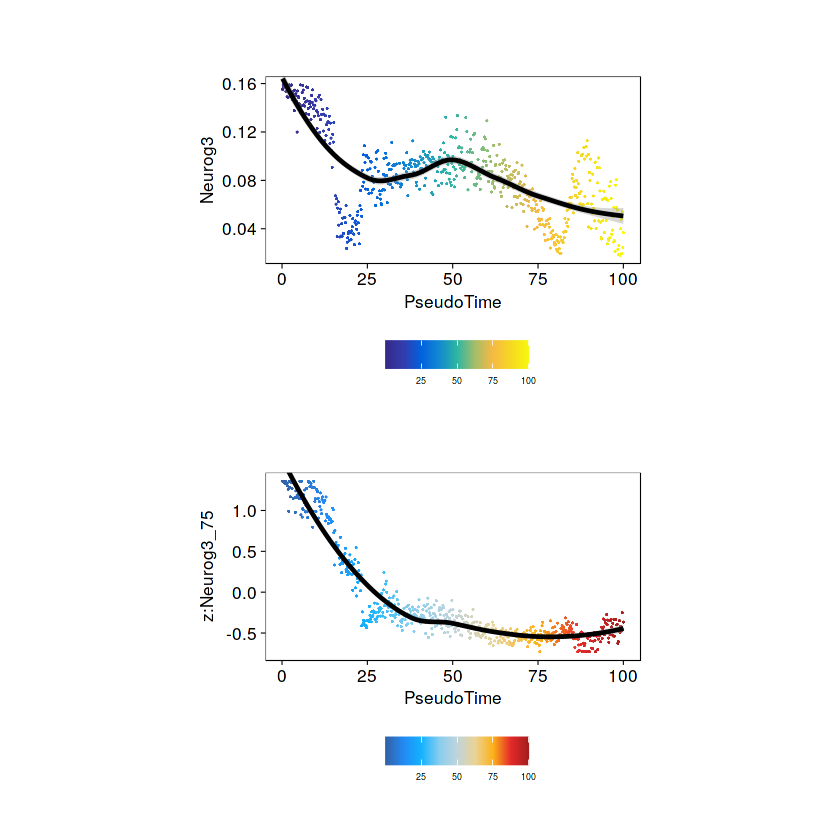

In [66]:
# Merged.proj2.Germ <- addImputeWeights(Merged.proj2.Germ,k=9,ka=3,td=2)
# p1 <- plotTrajectory(ArchRProj = Merged.proj2.Germ, trajectory  = "Major_trajectory", colorBy = "GeneScoreMatrix", name = "Etv3", continuousSet = "blueYellow")
p2 <- plotTrajectory(ArchRProj = Merged.proj2.Germ, trajectory  = "Major_trajectory", colorBy = "GeneIntegrationMatrix", name = "Neurog3", continuousSet = "blueYellow")
p3 <- plotTrajectory(ArchRProj = Merged.proj2.Germ, trajectory  = "Major_trajectory", colorBy = "MotifMatrix", name = "z:Neurog3_75", continuousSet = "solarExtra")
ggAlignPlots(
#     p1[[2]], 
    p2[[2]],p3[[2]])

### Motif analysis

In [5]:
getFeatures(Merged.proj2.Germ, select = paste(c("Neurog3", "Sohlh2", "Atf4", "Ybx2", "Stat1"), collapse="|"), useMatrix = "MotifMatrix")


[1] "z:Ybx2_821"            "z:Stat1_757"           "z:Atf4_121"           
 [4] "z:Neurog3_75"          "z:Sohlh2_48"           "deviations:Ybx2_821"  
 [7] "deviations:Stat1_757"  "deviations:Atf4_121"   "deviations:Neurog3_75"
[10] "deviations:Sohlh2_48"

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a7e5d2393-Date-2021-07-27_Time-17-50-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = MotifMatrix

Getting Matrix Values...

2021-07-27 17:50:02 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a7e5d2393-Date-2021-07-27_Time-17-50-02.log



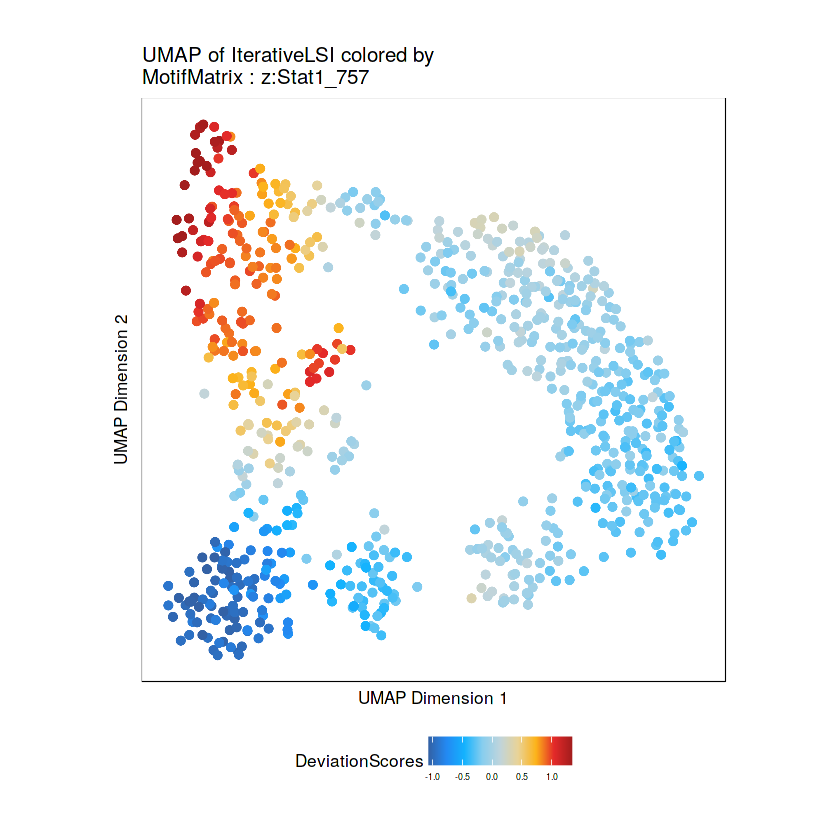

In [11]:
p <- plotEmbedding(
    ArchRProj = Merged.proj2.Germ, 
    colorBy = "MotifMatrix", 
    name = 'z:Stat1_757', 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(Merged.proj2.Germ),
    size=3,
    plotAs="NULL"
)
p

### Coaccessibility analysis

ArchR logging to : ArchRLogs/ArchR-addCoAccessibility-1cce3fc1ef47-Date-2021-01-14_Time-14-40-55.log
If there is an issue, please report to github with logFile!

2021-01-14 14:40:56 : Computing KNN, 0.002 mins elapsed.

2021-01-14 14:40:56 : Identifying Non-Overlapping KNN pairs, 0.01 mins elapsed.

2021-01-14 14:40:58 : Identified 291 Groupings!, 0.039 mins elapsed.

2021-01-14 14:40:59 : Computing Co-Accessibility chr1 (1 of 20), 0.059 mins elapsed.

2021-01-14 14:41:01 : Computing Co-Accessibility chr2 (2 of 20), 0.101 mins elapsed.

2021-01-14 14:41:03 : Computing Co-Accessibility chr3 (3 of 20), 0.133 mins elapsed.

2021-01-14 14:41:05 : Computing Co-Accessibility chr4 (4 of 20), 0.162 mins elapsed.

2021-01-14 14:41:08 : Computing Co-Accessibility chr5 (5 of 20), 0.21 mins elapsed.

2021-01-14 14:41:10 : Computing Co-Accessibility chr6 (6 of 20), 0.242 mins elapsed.

2021-01-14 14:41:12 : Computing Co-Accessibility chr7 (7 of 20), 0.27 mins elapsed.

2021-01-14 14:41:14 : Computi

GRanges object with 12688 ranges and 9 metadata columns:
          seqnames              ranges strand |       correlation
             <Rle>           <IRanges>  <Rle> |         <numeric>
      [1]     chr1     3185218-3185924      * | 0.510075220542794
      [2]     chr1     3583798-3584352      * | 0.580012856863387
      [3]     chr1     3852299-3852849      * | 0.651865793445457
      [4]     chr1     3852299-3878347      * |  0.67925904236252
      [5]     chr1     3852849-3878347      * | 0.819002657666251
      ...      ...                 ...    ... .               ...
  [12684]     chrX 162727598-162759608      * | 0.525487434960295
  [12685]     chrX 166440767-166479753      * | 0.527109988475744
  [12686]     chrX 166479753-166510491      * | 0.538197959795105
  [12687]     chrX 167381837-167382756      * | 0.629621669531926
  [12688]     chrX 168220339-168222562      * | 0.668614539708854
                  Variability1         Variability2            TStat
                

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-1cce1f4c4375-Date-2021-01-14_Time-14-41-36.log
If there is an issue, please report to github with logFile!

2021-01-14 14:41:36 : Validating Region, 0.002 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames          ranges strand |     gene_id      symbol
         <Rle>       <IRanges>  <Rle> | <character> <character>
  [1]     chr1 4773198-4785726      - |       27395      Mrpl15
  -------
  seqinfo: 21 sequences from mm10 genome


2021-01-14 14:41:36 : Adding Bulk Tracks (1 of 1), 0.003 mins elapsed.

Getting Region From Arrow Files 1 of 4

Getting Region From Arrow Files 2 of 4

Getting Region From Arrow Files 3 of 4

Getting Region From Arrow Files 4 of 4

2021-01-14 14:41:37 : Adding Feature Tracks (1 of 1), 0.017 mins elapsed.

2021-01-14 14:41:37 : Adding Loop Tracks (1 of 1), 0.017 mins elapsed.

2021-01-14 14:41:37 : Adding Gene Tracks (1 of 1), 0.018 mins elapsed.

2021-01-14 14:41:37 : Plotting, 0.02 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-1cce1f4c4375-Date-2021-01-14_Time-14-41-36.log

ArchR logging to : ArchRLogs/ArchR-addPeak2GeneLinks-1cce96829a4-Date-2021-01-14_Time-14-41-38.log
If there is an issue, please report to github with logFile!

2021-01-14 14:41:38 : Getting Available Matrices, 0.002 mins elapsed.

2021-01-14 14:41:38 : Filtered Low Prediction Score Cells (35 of 780, 0.045), 0.001 mins elapsed.

2021-01-14 14:41:38 : Computing KNN, 0.003 mins elapsed.

GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr15 102234938-102257522      - |       19411        Rarg
  -------
  seqinfo: 21 sequences from mm10 genome


2021-01-14 14:42:34 : Adding Bulk Tracks (1 of 1), 0.003 mins elapsed.

Getting Region From Arrow Files 1 of 4

Getting Region From Arrow Files 2 of 4

Getting Region From Arrow Files 3 of 4

Getting Region From Arrow Files 4 of 4

2021-01-14 14:42:34 : Adding Feature Tracks (1 of 1), 0.013 mins elapsed.

2021-01-14 14:42:34 : Adding Loop Tracks (1 of 1), 0.014 mins elapsed.

2021-01-14 14:42:35 : Adding Gene Tracks (1 of 1), 0.017 mins elapsed.

2021-01-14 14:42:35 : Plotting, 0.019 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-1cce75a636de-Date-2021-01-14_Time-14-42-34.log

ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-1cce601a4879-Date-2021-01-14_Time-14-42-39.log
If there is an issue, please report to github with logFile!

2021-01-14 14:42:42 : Determining KNN Groups!, 0.049 mins elapsed.

2021-01-14 14:42:43 : Ordering Peak2Gene Links!, 0.075 mins elapsed.

2021-01-14 14:42:48 : Constructing ATAC Heatmap!, 0.159 mins elapsed.

Adding Annot

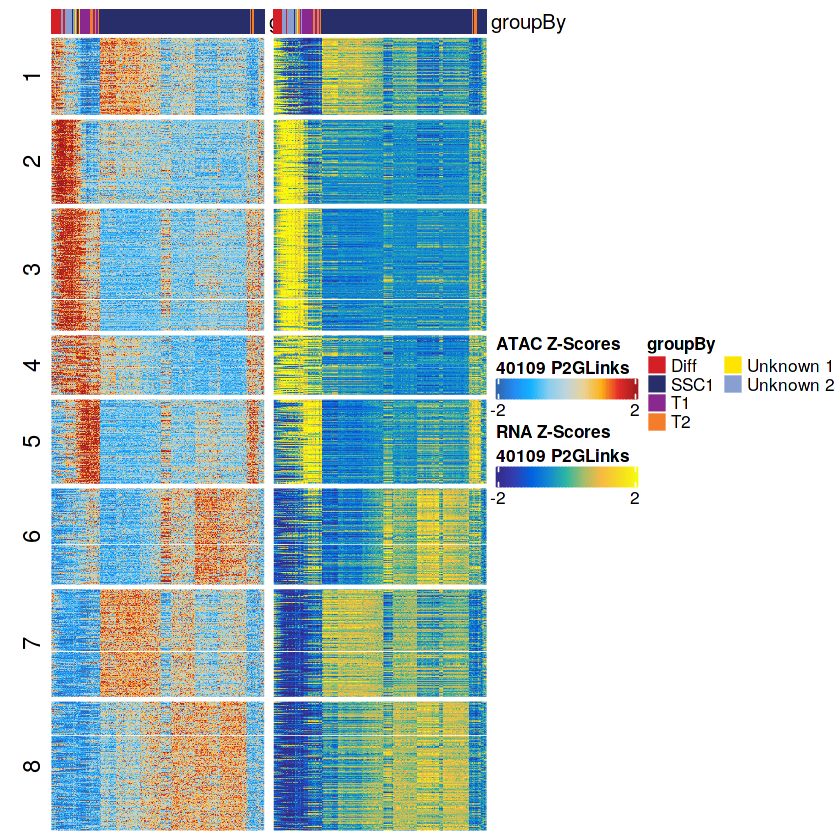

In [4]:
Merged.proj2.Germ <- addCoAccessibility(
    ArchRProj = Merged.proj2.Germ,
    reducedDims = "IterativeLSI"
)

cA <- getCoAccessibility(
    ArchRProj = Merged.proj2.Germ,
    corCutOff = 0.5,
    resolution = 1,
    returnLoops = TRUE
)

cA[[1]]

p <- plotBrowserTrack(
    ArchRProj = Merged.proj2.Germ, 
    groupBy = "predictedGroup_Co", 
    geneSymbol = "Mrpl15", 
    upstream = 50000,
    downstream = 50000,
    loops = cA[[1]]
)

Merged.proj2.Germ <- addPeak2GeneLinks(
    ArchRProj = Merged.proj2.Germ,
    reducedDims = "IterativeLSI"
)

p2g <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2.Germ,
    corCutOff = 0.2,
    resolution = 1,
    returnLoops = TRUE
)



p <- plotBrowserTrack(
    ArchRProj = Merged.proj2.Germ, 
    groupBy = "predictedGroup_Co", 
    geneSymbol = "Rarg", 
    upstream = 500000,
    downstream = 500000,
    loops = getCoAccessibility(Merged.proj2.Germ)
)

grid::grid.newpage()
grid::grid.draw(p$Mrpl15)

p <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2.Germ, groupBy = "predictedGroup_Co",k = 8)

p

In [169]:
pdf(file="Germ.p2g.heatmap.pdf")
p <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2.Germ, groupBy = c("Clusters","predictedGroup_Co"),corCutOff = 0.6,
       FDRCutOff = 1e-04,k = 5)
p
dev.off()

ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-501b216f2d9-Date-2020-10-24_Time-21-13-47.log
If there is an issue, please report to github with logFile!

2020-10-24 21:13:49 : Determining KNN Groups!, 0.031 mins elapsed.

2020-10-24 21:13:50 : Ordering Peak2Gene Links!, 0.047 mins elapsed.

2020-10-24 21:13:50 : Constructing ATAC Heatmap!, 0.056 mins elapsed.

Adding Annotations..

Preparing Main Heatmap..

2020-10-24 21:13:50 : Constructing RNA Heatmap!, 0.058 mins elapsed.

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-501b216f2d9-Date-2020-10-24_Time-21-13-47.log



png 
  2

In [5]:
p2g.mtx <- plotPeak2GeneHeatmap(ArchRProj = Merged.proj2.Germ, groupBy = c("Clusters","predictedGroup_Co"),corCutOff = 0.6,
       FDRCutOff = 1e-04,k = 5, returnMatrices = TRUE)

ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-1cce12f44dd6-Date-2021-01-14_Time-14-43-36.log
If there is an issue, please report to github with logFile!

2021-01-14 14:43:38 : Determining KNN Groups!, 0.035 mins elapsed.

2021-01-14 14:43:39 : Ordering Peak2Gene Links!, 0.052 mins elapsed.



In [8]:
p2g.heatmap.df %>% head()

idxATAC idxRNA Correlation FDR          VarQATAC  VarQRNA  
1 194     22     0.7017254   1.336909e-42 0.8339571 0.5083296
2 184     23     0.6189900   9.047556e-31 0.9811669 0.9768873
3 343     44     0.6395269   2.283917e-33 0.5829615 0.9317124
4 330     45     0.6556314   1.504935e-35 0.3925915 0.3957176
5 354     47     0.6051769   3.956761e-29 0.8786287 0.4209815
6 367     56     0.7367226   6.187407e-49 0.7962550 0.4586523
  peak                   gene   cluster
1 chr1:9908983-9909483   Mcmdc2 1      
2 chr1:9748222-9748722   Snhg6  2      
3 chr1:16028938-16029438 Terf1  1      
4 chr1:15644678-15645178 Sbspon 3      
5 chr1:16214910-16215410 Rdh10  1      
6 chr1:17091368-17091868 Gdap1  3

### Prepare arcs track for pygenometrack

In [72]:
p2g.df <- getPeak2GeneLinks(
    ArchRProj = Merged.proj2.Germ,
    corCutOff = 0.2,
    resolution = 1,
    returnLoops = FALSE
)

In [73]:
tss.peaks <- metadata(p2g.df)[[2]] %>% as.data.frame() %>% mutate(end = end +1)%>% 
mutate(gene = name) %>%
dplyr::select(gene,seqnames:end)
p2g.heatmap.addtss.df <- p2g.heatmap.df %>% inner_join(tss.peaks,by = "gene") 



In [110]:
p2g.heatmap.addtss.df %>% glimpse()

Rows: 12,819
Columns: 12
$ idxATAC     <int> 194, 184, 343, 330, 354, 367, 431, 436, 429, 443, 438, 43…
$ idxRNA      <int> 22, 23, 44, 45, 47, 56, 69, 69, 70, 71, 72, 73, 79, 80, 8…
$ Correlation <dbl> 0.7017254, 0.6189900, 0.6395269, 0.6556314, 0.6051769, 0.…
$ FDR         <dbl> 1.336909e-42, 9.047556e-31, 2.283917e-33, 1.504935e-35, 3…
$ VarQATAC    <dbl> 0.8339571, 0.9811669, 0.5829615, 0.3925915, 0.8786287, 0.…
$ VarQRNA     <dbl> 0.5083296, 0.9768873, 0.9317124, 0.3957176, 0.4209815, 0.…
$ peak        <fct> chr1:9908983-9909483, chr1:9748222-9748722, chr1:16028938…
$ gene        <chr> "Mcmdc2", "Snhg6", "Terf1", "Sbspon", "Rdh10", "Gdap1", "…
$ cluster     <int> 1, 2, 1, 3, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 2, 3, 3, 3, 3, …
$ seqnames    <fct> chr1, chr1, chr1, chr1, chr1, chr1, chr1, chr1, chr1, chr…
$ start       <int> 9908638, 9944118, 15805646, 15892722, 16105882, 17145373,…
$ end         <dbl> 9908639, 9944119, 15805647, 15892723, 16105883, 17145374,…


In [112]:
# library(ChIPpeakAnno)
# library(ChIPseeker)
# # if (!requireNamespace("BiocManager", quietly=TRUE))
# #     install.packages("BiocManager")
# # BiocManager::install("annotatr")
# library(annotatr)
# library(genomation)
# library(TxDb.Mmusculus.UCSC.mm10.knownGene)
# txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
germ.p2g.anno <- p2g.heatmap.addtss.df %>% dplyr::select(peak,gene,cluster,Correlation:VarQRNA) %>% separate(peak,c("chr1","start1"),sep = ":") %>% 
separate(start1,c("start1","end1"),sep = "-") %>% 
transmute(chr=chr1,start=start1,end=end1,gene=gene,cluster=cluster,Correlation=Correlation,FDR=FDR,VarQRNA=VarQRNA) %>% 
makeGRangesFromDataFrame(keep.extra.columns=TRUE) %>%
annotatePeak(tssRegion=c(-1000,1000),
                         TxDb=txdb, annoDb="org.Mm.eg.db")

>> preparing features information...		 2021-01-18 11:44:59 AM 
>> identifying nearest features...		 2021-01-18 11:44:59 AM 
>> calculating distance from peak to TSS...	 2021-01-18 11:44:59 AM 
>> assigning genomic annotation...		 2021-01-18 11:44:59 AM 
>> adding gene annotation...			 2021-01-18 11:45:01 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-01-18 11:45:01 AM 
>> done...					 2021-01-18 11:45:01 AM 


In [239]:
## perpare arcs for each cluster
## add tss region df
tss.peaks <- metadata(p2g.df)[[2]] %>% as.data.frame() %>% mutate(end = end +1)%>% 
mutate(gene = name) %>%
dplyr::select(gene,seqnames:end)
p2g.heatmap.addtss.df <- p2g.heatmap.df %>% inner_join(tss.peaks,by = "gene") 

for (i in p2g.heatmap.addtss.df$cluster) {
p2g.heatmap.addtss.df %>% separate(peak,c("chr1","start1"),sep = ":") %>% 
separate(start1,c("start1","end1"),sep = "-") %>%
filter(cluster == i) %>% dplyr::select(chr1:end1,seqnames:end,Correlation) %>% 
    write_tsv(paste0("~/Gonocyte/Raw_data/genometrack/Germcell/germ.p2g.heatmap.cluster",i,".arc"),col_names=FALSE)
    }

as.data.frame(p2g[[1]]) %>% mutate(start1=start) %>% mutate(end1=start+1)%>% 
mutate(seqnames1=seqnames) %>% mutate(seqnames2=seqnames) %>% mutate(coaccess = value) %>%
mutate(start2=end) %>% mutate(end2=end+1) %>% 
dplyr::select(seqnames1,start1,end1,seqnames2,start2,end2,coaccess) %>% 
write_tsv("~/Gonocyte/Raw_data/genometrack/Germcell/germ.p2g.arc",col_names=FALSE)

### Find positive TF regulator

In [123]:
# Using Clusters for the testing
seGroupMotif <- getGroupSE(ArchRProj = Merged.proj2.Germ, useMatrix = "MotifMatrix", groupBy = "Clusters")

seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]

rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

corGSM_MM <- correlateMatrices(
    ArchRProj = Merged.proj2.Germ,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)

corGIM_MM <- correlateMatrices(
    ArchRProj = Merged.proj2.Germ,
    useMatrix1 = "GeneIntegrationMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)

corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGIM_MM$maxDelta <- rowData(seZ)[match(corGIM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]

ArchR logging to : ArchRLogs/ArchR-getGroupSE-6a5d45b1c8fe-Date-2020-11-10_Time-11-54-08.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2020-11-10 11:54:09 : Constructing Group Matrix 1 of 2, 0 mins elapsed.

2020-11-10 11:54:10 : Finished Group Matrix 1 of 2, 0.017 mins elapsed.

2020-11-10 11:54:10 : Constructing Group Matrix 2 of 2, 0.017 mins elapsed.

2020-11-10 11:54:10 : Finished Group Matrix 2 of 2, 0.03 mins elapsed.

2020-11-10 11:54:10 : Successfully Created Group Matrix, 0.03 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-6a5d45b1c8fe-Date-2020-11-10_Time-11-54-08.log

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-6a5d1ce82739-Date-2020-11-10_Time-11-54-11.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures

In [124]:
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.4 & corGSM_MM$padj < 0.1 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.5))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

corGIM_MM <- corGIM_MM[order(abs(corGIM_MM$cor), decreasing = TRUE), ]
corGIM_MM <- corGIM_MM[which(!duplicated(gsub("\\-.*","",corGIM_MM[,"MotifMatrix_name"]))), ]
corGIM_MM$TFRegulator <- "NO"
corGIM_MM$TFRegulator[which(corGIM_MM$cor > 0.4 & corGIM_MM$padj < 0.1 & corGIM_MM$maxDelta > quantile(corGIM_MM$maxDelta, 0.5))] <- "YES"
sort(corGIM_MM[corGIM_MM$TFRegulator=="YES",1])

postiveTF <- corGIM_MM$GeneIntegrationMatrix_name[corGIM_MM$TFRegulator=="YES"]
postiveTF.GS <- corGSM_MM$GeneScoreMatrix_name[corGSM_MM$TFRegulator=="YES"]
postiveTF 
postiveTF.GS
postiveTF.common <- intersect(postiveTF,postiveTF.GS)
postiveTF.common

[1] "Arid3a"  "Atf5"    "Atf6b"   "Ctcf"    "E2f1"    "E2f3"    "E2f8"   
 [8] "E4f1"    "Ebf1"    "Egr1"    "Egr2"    "Egr4"    "Erg"     "Fosl2"  
[15] "Foxi1"   "Foxj2"   "Foxl1"   "Foxl1"   "Foxl1"   "Foxl1"   "Foxl1"  
[22] "Foxl1"   "Foxl1"   "Foxl1"   "Foxl1"   "Foxo3"   "Foxo6"   "Foxp1"  
[29] "Foxp3"   "Gli3"    "Glis2"   "Hivep1"  "Hnf4g"   "Hoxd10"  "Irf1"   
[36] "Irf3"    "Junb"    "Jund"    "Klf10"   "Klf11"   "Klf6"    "Klf7"   
[43] "Lhx1"    "Mesp2"   "Mypop"   "Neurog1" "Nfil3"   "Nfya"    "Nr1i2"  
[50] "Olig1"   "Pitx1"   "Pitx2"   "Pitx3"   "Plagl1"  "Pparg"   "Rfx1"   
[57] "Rfx2"    "Runx3"   "Smad9"   "Smarcc2" "Sp4"     "Stat2"   "Stat3"  
[64] "Tal2"    "Tef"     "Yy1"     "Zfp219"  "Zkscan5"

Warning message:
“Removed 81 rows containing missing values (geom_point).”


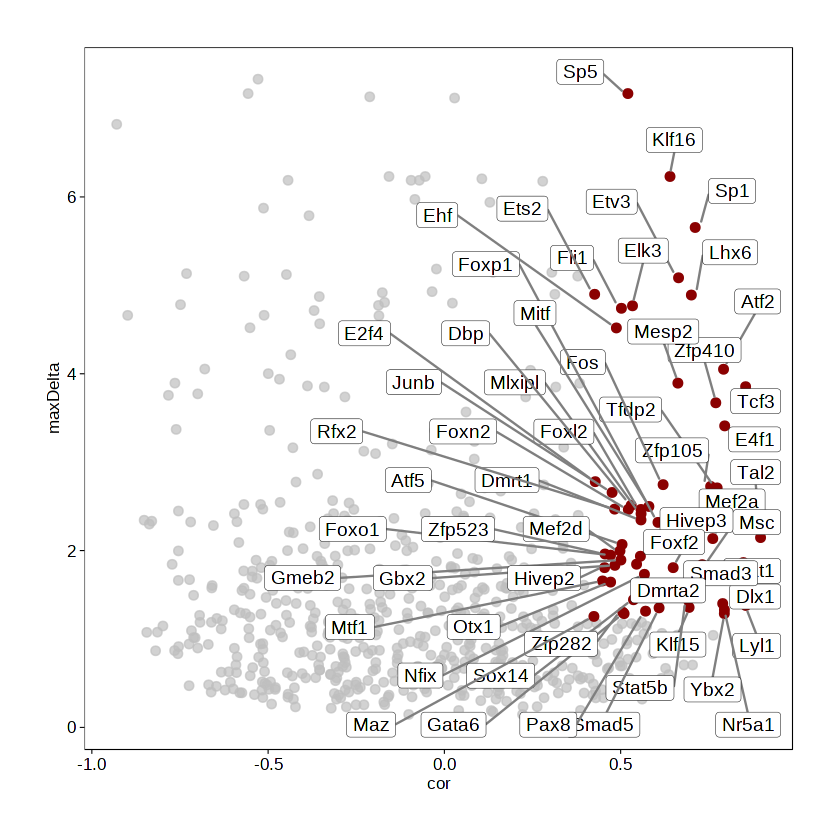

In [164]:
## scatter plot
# pdf(file="allcell.positiveTF.pdf",width=8,height=8)
ggplot(data.frame(corGIM_MM), aes(cor, maxDelta, lable = GeneIntegrationMatrix_name))+ 
geom_point(colour="darkred",size=2) +
theme_ArchR()+
gghighlight(cor > 0.4 & padj < 0.1 & maxDelta > quantile(corGIM_MM$maxDelta, 0.5)) +
geom_label_repel(aes(label = GeneIntegrationMatrix_name),
                  box.padding   = 0.5, 
                 label.size = 0.1,
                  point.padding = 0.5,
                  segment.size = 0.5,
                  segment.color = 'grey50')
# dev.off()

In [130]:
# Using xxxx for the testing
seGroupMotif <- getGroupSE(ArchRProj = Merged.proj2.Germ, useMatrix = "MotifMatrix", groupBy = "predictedGroup_Co")

seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]

rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

corGSM_MM <- correlateMatrices(
    ArchRProj = Merged.proj2.Germ,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)

corGIM_MM <- correlateMatrices(
    ArchRProj = Merged.proj2.Germ,
    useMatrix1 = "GeneIntegrationMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)

corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGIM_MM$maxDelta <- rowData(seZ)[match(corGIM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]

ArchR logging to : ArchRLogs/ArchR-getGroupSE-6a5d15850dba-Date-2020-11-10_Time-12-08-27.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2020-11-10 12:08:27 : Constructing Group Matrix 1 of 2, 0 mins elapsed.

2020-11-10 12:08:28 : Finished Group Matrix 1 of 2, 0.016 mins elapsed.

2020-11-10 12:08:28 : Constructing Group Matrix 2 of 2, 0.016 mins elapsed.

2020-11-10 12:08:29 : Finished Group Matrix 2 of 2, 0.029 mins elapsed.

2020-11-10 12:08:29 : Successfully Created Group Matrix, 0.029 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-6a5d15850dba-Date-2020-11-10_Time-12-08-27.log

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-6a5d50acefdf-Date-2020-11-10_Time-12-08-30.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatur

In [131]:
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.4 & corGSM_MM$padj < 0.1 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.5))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

corGIM_MM <- corGIM_MM[order(abs(corGIM_MM$cor), decreasing = TRUE), ]
corGIM_MM <- corGIM_MM[which(!duplicated(gsub("\\-.*","",corGIM_MM[,"MotifMatrix_name"]))), ]
corGIM_MM$TFRegulator <- "NO"
corGIM_MM$TFRegulator[which(corGIM_MM$cor > 0.4 & corGIM_MM$padj < 0.1 & corGIM_MM$maxDelta > quantile(corGIM_MM$maxDelta, 0.5))] <- "YES"
sort(corGIM_MM[corGIM_MM$TFRegulator=="YES",1])

postiveTF <- corGIM_MM$GeneIntegrationMatrix_name[corGIM_MM$TFRegulator=="YES"]
postiveTF.GS <- corGSM_MM$GeneScoreMatrix_name[corGSM_MM$TFRegulator=="YES"]
postiveTF 
postiveTF.GS
postiveTF.common <- intersect(postiveTF,postiveTF.GS)
postiveTF.common

[1] "Arid3a"  "Atf5"    "Atf6b"   "Ctcf"    "E2f1"    "E2f3"    "E2f8"   
 [8] "E4f1"    "Egr1"    "Egr2"    "Egr4"    "Erg"     "Esrrb"   "Fosl2"  
[15] "Foxi1"   "Foxj2"   "Foxl1"   "Foxl1"   "Foxl1"   "Foxl1"   "Foxl1"  
[22] "Foxl1"   "Foxl1"   "Foxl1"   "Foxl1"   "Foxo3"   "Foxo6"   "Foxp1"  
[29] "Foxp3"   "Gli3"    "Hivep1"  "Hnf4g"   "Hoxd10"  "Irf1"    "Irf3"   
[36] "Junb"    "Jund"    "Klf10"   "Klf11"   "Klf15"   "Klf6"    "Klf7"   
[43] "Klf9"    "Lhx1"    "Mesp2"   "Neurog1" "Nfil3"   "Nfya"    "Nr1i2"  
[50] "Olig1"   "Pbx2"    "Pitx1"   "Pitx2"   "Pitx3"   "Plagl1"  "Pparg"  
[57] "Rfx1"    "Rfx2"    "Runx3"   "Smad9"   "Smarcc2" "Sp4"     "Stat2"  
[64] "Stat3"   "Stat5a"  "Tal1"    "Tal2"    "Tef"     "Yy1"     "Zfp219" 
[71] "Zkscan5"

[1] "Atf2"   "Atf5"   "Dbp"    "Dlx1"   "Dmrt1"  "Dmrta2" "E2f4"   "E4f1"  
 [9] "Ehf"    "Elk3"   "Ets2"   "Etv3"   "Fli1"   "Fos"    "Foxf2"  "Foxl2" 
[17] "Foxn2"  "Foxo1"  "Foxp1"  "Gata6"  "Gbx2"   "Gmeb2"  "Hivep2" "Hivep3"
[25] "Junb"   "Klf15"  "Klf16"  "Lhx6"   "Lyl1"   "Maz"    "Mef2a"  "Mef2d" 
[33] "Mesp2"  "Mitf"   "Mlxipl" "Msc"    "Mtf1"   "Nfix"   "Nr5a1"  "Otx1"  
[41] "Pax8"   "Rfx2"   "Smad3"  "Smad5"  "Sox14"  "Sp1"    "Sp5"    "Stat1" 
[49] "Stat5b" "Tal2"   "Tcf3"   "Tfdp2"  "Ybx2"   "Zfp105" "Zfp282" "Zfp410"
[57] "Zfp523"

[1] "Tal2"   "Lyl1"   "Tcf3"   "Stat1"  "E4f1"   "Nr5a1"  "Ybx2"   "Atf2"  
 [9] "Dlx1"   "Tfdp2"  "Zfp410" "Mef2a"  "Zfp105" "Msc"    "Sp1"    "Smad3" 
[17] "Lhx6"   "Klf15"  "Stat5b" "Etv3"   "Mesp2"  "Hivep3" "Klf16"  "Fos"   
[25] "Smad5"  "Foxp1"  "Mitf"   "Pax8"   "Nfix"   "Mlxipl" "Foxl2"  "Dmrt1" 
[33] "Foxf2"  "Dmrta2" "Sox14"  "Elk3"   "Dbp"    "Foxn2"  "Sp5"    "Gata6" 
[41] "Zfp282" "Atf5"   "Fli1"   "Gmeb2"  "Mef2d"  "Ehf"    "Gbx2"   "Rfx2"  
[49] "Junb"   "Otx1"   "Foxo1"  "Zfp523" "Hivep2" "Mtf1"   "E2f4"   "Ets2"  
[57] "Maz"

[1] "Foxo3"   "Nfya"    "Stat3"   "Tef"     "Hivep1"  "Klf10"   "Hnf4g"  
 [8] "Irf1"    "Smad9"   "E4f1"    "Rfx1"    "Pitx3"   "Foxl1"   "Smarcc2"
[15] "Tal1"    "Klf7"    "Arid3a"  "Foxj2"   "Atf6b"   "E2f3"    "Pparg"  
[22] "Stat5a"  "Jund"    "Pitx1"   "Klf9"    "E2f8"    "Sp4"     "Runx3"  
[29] "Foxl1"   "Junb"    "Egr2"    "Egr4"    "Gli3"    "Foxl1"   "Olig1"  
[36] "Foxl1"   "Hoxd10"  "Irf3"    "Klf15"   "Rfx2"    "Tal2"    "Plagl1" 
[43] "E2f1"    "Foxo6"   "Ctcf"    "Foxl1"   "Foxl1"   "Atf5"    "Yy1"    
[50] "Foxl1"   "Foxp1"   "Mesp2"   "Egr1"    "Klf11"   "Neurog1" "Foxl1"  
[57] "Pbx2"    "Nr1i2"   "Nfil3"   "Fosl2"   "Zkscan5" "Esrrb"   "Lhx1"   
[64] "Zfp219"  "Foxl1"   "Klf6"    "Erg"     "Stat2"   "Foxp3"   "Pitx2"  
[71] "Foxi1"

[1] "Tal2"  "E4f1"  "Klf15" "Mesp2" "Foxp1" "Atf5"  "Rfx2"  "Junb"

In [163]:
## scatter plot
 pdf(file="germcell.positiveTF.pdf",width=8,height=8)
ggplot(data.frame(corGIM_MM), aes(cor, maxDelta, lable = GeneIntegrationMatrix_name))+ 
geom_point(colour="darkred",size=2) +
theme_ArchR()+
gghighlight(cor > 0.4 & padj < 0.1 & maxDelta > quantile(corGIM_MM$maxDelta, 0.5)) +
geom_label_repel(aes(label = GeneIntegrationMatrix_name),
                  box.padding   = 0.5, 
                 label.size = 0.1,
                  point.padding = 0.5,
                  segment.size = 0.5,
                  segment.color = 'grey50')
dev.off()

Warning message:
“Removed 81 rows containing missing values (geom_point).”


png 
  2

In [140]:
## Export for heatmap generation

markersGIM.clusters <- getMarkerFeatures(
    ArchRProj = Merged.proj2.Germ, 
    useMatrix = "GeneIntegrationMatrix", 
    maxCells = 5000,
#      useGroups= usegroups,
    groupBy = "Clusters",
    k=200,
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-6a5d66052bb4-Date-2020-11-10_Time-12-28-32.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-11-10 12:28:32 : Matching Known Biases, 0.001 mins elapsed.

2020-11-10 12:28:33 : Computing Pairwise Tests (1 of 7), 0.015 mins elapsed.

2020-11-10 12:28:48 : Computing Pairwise Tests (2 of 7), 0.266 mins elapsed.

2020-11-10 12:29:03 : Computing Pairwise Tests (3 of 7), 0.51 mins elapsed.

2020-11-10 12:29:17 : Computing Pairwise Tests (4 of 7), 0.759 mins elapsed.

2020-11-10 12:29:33 : Computing Pairwise Tests (5 of 7), 1.01 mins elapsed.

2020-11-10 12:29:47 : Computing Pairwise Tests (6 of 7), 1.255 mins elapsed.

2020-11-10 12:30:02 : Computing Pairwise Tests (7 of 7), 1.509 mins elapsed.

###########
2020-11-10 12:30:18 : Completed Pairwise Tests, 1.764 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-6a5d66052bb4-Date-2020-11-10_Time-12

In [139]:
rownames(markersGIM) <- rowData(markersGIM)$name
colData(markersGIM)$celltype <- colnames(markersGIM)
rownames(seZ) <- gsub("_.*","",rowData(seZ)$name)
colData(seZ)$celltype <- colData(seZ)$predictedGroup_Co
saveRDS(markersGIM,file="germcell.markersGIM.rds")
saveRDS(seZ,file="germcell.seZ.rds")
saveRDS(postiveTF,file="germcell.postiveTF.rds")

In [162]:
rownames(markersGIM.clusters) <- rowData(markersGIM.clusters)$name
colData(markersGIM.clusters)$celltype <- colnames(markersGIM.clusters)

seGroupMotif.clusters <- getGroupSE(ArchRProj = Merged.proj2.Germ, useMatrix = "MotifMatrix", groupBy = "Clusters")
seZ.clusters <- seGroupMotif.clusters[rowData(seGroupMotif.clusters)$seqnames=="z",]
rownames(seZ.clusters) <- gsub("_.*","",rowData(seZ.clusters)$name)
colData(seZ.clusters)$celltype <- colData(seZ.clusters)$Clusters
saveRDS(markersGIM.clusters,file="germcell.markersGIM.byclusters.rds")
saveRDS(seZ.clusters,file="germcell.seZ.byclusters.rds")
saveRDS(postiveTF,file="germcell.postiveTF.rds")

ArchR logging to : ArchRLogs/ArchR-getGroupSE-6a5d448f6898-Date-2020-11-10_Time-13-47-14.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2020-11-10 13:47:14 : Constructing Group Matrix 1 of 2, 0 mins elapsed.

2020-11-10 13:47:15 : Finished Group Matrix 1 of 2, 0.016 mins elapsed.

2020-11-10 13:47:15 : Constructing Group Matrix 2 of 2, 0.016 mins elapsed.

2020-11-10 13:47:16 : Finished Group Matrix 2 of 2, 0.029 mins elapsed.

2020-11-10 13:47:16 : Successfully Created Group Matrix, 0.029 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-6a5d448f6898-Date-2020-11-10_Time-13-47-14.log



In [161]:
seZ.clusters <- seGroupMotif[rowData(seGroupMotif.clusters)$seqnames=="z",]
seZ.clusters
seGroupMotif.clusters

class: SummarizedExperiment 
dim: 884 6 
metadata(0):
assays(1): MotifMatrix
rownames(884): f885 f886 ... f1767 f1768
rowData names(3): seqnames idx name
colnames(6): Diff T1 ... Unknown 1 Unknown 2
colData names(22): TSSEnrichment ReadsInTSS ... predictedScore_Co1
  nCells

class: SummarizedExperiment 
dim: 1768 7 
metadata(0):
assays(1): MotifMatrix
rownames(1768): f1 f2 ... f1767 f1768
rowData names(3): seqnames idx name
colnames(7): C1 C2 ... C6 C7
colData names(22): TSSEnrichment ReadsInTSS ... predictedScore_Co1
  nCells

In [292]:
markersGIM.TF <- markersGIM[rowData(markersGIM)$name %in% postiveTF,]
options(repr.plot.width=10,repr.plot.height=5)
heatmapGIM <- plotMarkerHeatmap(
  seMarker = markersGIM.TF, 
  cutOff = "FDR <= 0.01 & Log2FC >= 1", 
 labelMarkers = postiveTF,
  transpose = TRUE,
    binaryClusterRows = TRUE,
       clusterCols = TRUE,
#     plotLog2FC = TRUE
)
pdf(file="germ.postiveTF.heatmapGIM.pdf")
ComplexHeatmap::draw(heatmapGIM, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-501b5e0d417d-Date-2020-10-25_Time-00-10-18.log
If there is an issue, please report to github with logFile!

Identified 18 markers!

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-501b5e0d417d-Date-2020-10-25_Time-00-10-18.log



png 
  2

In [301]:
markersGS.TF <- markersGS[rowData(markersGS)$name %in% postiveTF.GS,]
options(repr.plot.width=10,repr.plot.height=5)
heatmapGSM <- plotMarkerHeatmap(
  seMarker = markersGS.TF, 
  cutOff = "FDR <= 1 & Log2FC >= 0", 
 labelMarkers = postiveTF.GS,
  transpose = TRUE,
    binaryClusterRows = TRUE,
       clusterCols = TRUE,
#     plotLog2FC = TRUE
)
pdf(file="germ.postiveTF.heatmapGSM.pdf")
ComplexHeatmap::draw(heatmapGSM, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-501b1a804747-Date-2020-10-25_Time-00-13-23.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	Hnf4g, Olig1, Smad9, Atf6b, Hoxd10, Pitx2, Pparg, Irf3, Hivep1, Tal2, Mesp2, Ctcf, Ebf1, Stat3, Klf11, Klf6, Gli3, Neurog1, E2f1, Foxj2

C2:

	Smarcc2, Irf1, Glis2, Rfx2, Hoxd10, Pitx2, Foxp1, Rfx1, Egr2, Foxi1, Lhx1, E2f3, Hivep1, Nr1i2, Erg, Pitx3, Tal2, Egr4, Atf5, Mesp2

C3:

	Tef, Egr1, Arid3a, Irf1, Pitx1, Glis2, Nfya, Rfx2, Foxo6, Runx3, Foxp1, Irf3, Egr2, Stat2, Hivep1, Nr1i2, E4f1, Pitx3, Fosl2, Atf5

C4:

	Yy1, Tef, Egr1, E2f8, Plagl1, Arid3a, Smarcc2, Irf1, Sp4, Klf10, Glis2, Atf6b, Nfya, Pparg, Rfx1, Stat2, E4f1, Fosl2, Atf5, Jund

C5:

	Olig1, Foxl1, Pitx1, Klf10, Foxo6, Runx3, Zkscan5, Pparg, Irf3, Rfx1, Stat2, Foxi1, Lhx1, E2f3, Nr1i2, Erg, E4f1, Fosl2, Egr4, Atf5

C6:

	Klf7, Zfp219, Plagl1, Arid3a, Smarcc2, Sp4, Pitx1, Klf10, Atf6b, Nfya, Hoxd10, Zkscan5, Egr2, Stat2, Foxi1, Lh

png 
  2

## save project


In [96]:
Merged.proj2.Germ <- saveArchRProject(ArchRProj = Merged.proj2.Germ, outputDirectory = "Germ.subset.newversion", overwrite = TRUE,load = TRUE)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         